### Import libraries

In [1]:
!pip install opensmile

In [1]:
import imblearn
from collections import Counter
from sklearn.datasets import make_classification
from matplotlib import pyplot
from imblearn.over_sampling import SMOTE
from numpy import where
oversample = SMOTE()
from imblearn.under_sampling import RandomUnderSampler
undersample=RandomUnderSampler(sampling_strategy='auto', random_state=42)

In [2]:
import glob
import librosa
import os
import sklearn.mixture
import sys
# import pysptk
import pyworld
import opensmile
import audiofile
#import audb|

import time

import numpy as np
import pandas as pd

In [3]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score

## Open Smile

In [4]:
smile = opensmile.Smile(
    feature_set=opensmile.FeatureSet.eGeMAPSv02,
    feature_level=opensmile.FeatureLevel.Functionals,
)
#smile.feature_names
# setting up the feature extracter

In [5]:
smile.feature_names

['F0semitoneFrom27.5Hz_sma3nz_amean',
 'F0semitoneFrom27.5Hz_sma3nz_stddevNorm',
 'F0semitoneFrom27.5Hz_sma3nz_percentile20.0',
 'F0semitoneFrom27.5Hz_sma3nz_percentile50.0',
 'F0semitoneFrom27.5Hz_sma3nz_percentile80.0',
 'F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2',
 'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope',
 'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope',
 'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope',
 'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope',
 'loudness_sma3_amean',
 'loudness_sma3_stddevNorm',
 'loudness_sma3_percentile20.0',
 'loudness_sma3_percentile50.0',
 'loudness_sma3_percentile80.0',
 'loudness_sma3_pctlrange0-2',
 'loudness_sma3_meanRisingSlope',
 'loudness_sma3_stddevRisingSlope',
 'loudness_sma3_meanFallingSlope',
 'loudness_sma3_stddevFallingSlope',
 'spectralFlux_sma3_amean',
 'spectralFlux_sma3_stddevNorm',
 'mfcc1_sma3_amean',
 'mfcc1_sma3_stddevNorm',
 'mfcc2_sma3_amean',
 'mfcc2_sma3_stddevNorm',
 'mfcc3_sma3_amean',
 'mfcc3_sma3_stddevNorm',
 'mfcc4_

## Speaker wise performance

### Feature extraction

In [51]:
class DataPrep:
#     files=[]
    def __init__(self, index,folderPath=None):




        self.folderPath = folderPath
        #         self.classFolder = os.listdir(self.folderPath)

        self.spk_files_path = os.path.join(self.folderPath)
        self.spk_files = os.listdir(folderPath)


        #         print(self.classFolder)

        self.file_features = np.zeros((1,88))
#         self.labels = np.zeros(1)

        Y=[0]
        spk_label=['sp']
#         for spks in range(len(self.spk_folders)):

#             print(self.spk_folders[spks])

#             self.spk_files_path = os.path.join(self.folderPath, self.spk_folders[spks])
#             self.spk_files = os.listdir(self.spk_files_path)

            #                 print(self.spk_files)
        self.files=[]
        for spk_file in range(len(self.spk_files)):

            wav_path = os.path.join(self.folderPath,self.spk_files[spk_file])
#                 print(wav_path)


            y = smile.process_file(wav_path)
            self.files.append(self.spk_files[spk_file])

            ######################################################################

            #                     print(mfcc)

            file_feats = np.asarray(y)

            self.file_features = np.concatenate((self.file_features, file_feats),axis=0)
            label=folderPath
            label=label[index]
#             print(label)
#                 print(label)
            if label=='D':
                l=1
            else:
                l=0

#                 print(l)
            Y.append(l)
            spk_label.append(folderPath)
#                 self.labels = np.concatenate((self.labels,np.ones((len(file_feats),1))*y),axis=0)
                #                 self.labels = np.concatenate((self.labels,np.ones((len(file_feats),1))*cls), axis=0)
#                 print(len(self.labels))


        self.file_features = self.file_features[1:,:]
        print(self.file_features.shape)

        self.labels=np.asarray(Y)
        self.labels=self.labels.T
        self.labels=self.labels[1:]

        self.speaker_labels=np.asarray(Y)
        self.speaker_labels=self.speaker_labels.T
        self.speaker_labels=self.speaker_labels[1:]

In [52]:
def accuracy(y_test, prob_score, s_test):
    spk_list=list(set(s_test))
#     print(spk_list)
    avg_score=np.zeros((len(spk_list),2))

    for i in range(len(spk_list)):
        count=0
        for j in range(len(s_test)):
            if (spk_list[i] == s_test[j]):
                avg_score[i,0]=avg_score[i,0]+prob_score[j,0]
                avg_score[i,1]=avg_score[i,1]+prob_score[j,1]
                count=count+1
        avg_score[i]=avg_score[i]/(count)

    y_final=[10]
    for i in range(len(spk_list)):
        if (avg_score[i,0]>=avg_score[i,1]):
            y_final.append(0)
        else:
            y_final.append(1)
    y_final=y_final[1:]
    y_test=[10]
    for i in range(len(spk_list)):
        label=spk_list[i][2]
        if label=='D':
            y_test.append(0)
        else:
            y_test.append(1)
    y_test=y_test[1:]

    print("Speaker level accuracy: ",accuracy_score(y_test, y_final))
    print(sklearn.metrics.confusion_matrix(y_test, y_final))


#### Entire Test data

In [53]:
Train_dataD=DataPrep(20,'Training/Utterances_D')
Train_dataN=DataPrep(20,'Training/Utterances_ND')

Test_dataD=DataPrep(10,'Test/Test_D')
Test_dataN=DataPrep(10,'Test/Test_ND')

(57, 88)
(192, 88)
(33, 88)


C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\opensmile\core\smile.py:307: UserWarning: Segment too short, filling with NaN.
  warnings.warn(


(201, 88)


In [54]:
t1=np.array(Train_dataD.files)
t2=np.array(Train_dataN.files)
Train_file=np.concatenate((t1,t2))
te1=np.array(Test_dataD.files)
te2=np.array(Test_dataN.files)
Test_file=np.concatenate((te1,te2))
Train_file.shape

(249,)

In [12]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Dense
# from keras.models import Model

In [3]:
encoding_dim = 10
ncol=88
input_dim = Input(shape = (ncol, ))

# Encoder Layers
encoded1 = Dense(3000, activation = 'relu')(input_dim)
encoded2 = Dense(2750, activation = 'relu')(encoded1)
encoded3 = Dense(2500, activation = 'relu')(encoded2)
encoded4 = Dense(2250, activation = 'relu')(encoded3)
encoded5 = Dense(2000, activation = 'relu')(encoded4)
encoded6 = Dense(1750, activation = 'relu')(encoded5)
encoded7 = Dense(1500, activation = 'relu')(encoded6)
encoded8 = Dense(1250, activation = 'relu')(encoded7)
encoded9 = Dense(1000, activation = 'relu')(encoded8)
encoded10 = Dense(750, activation = 'relu')(encoded9)
encoded11 = Dense(500, activation = 'relu')(encoded10)
encoded12 = Dense(250, activation = 'relu')(encoded11)
encoded13 = Dense(encoding_dim, activation = 'relu')(encoded12)

# Decoder Layers
decoded1 = Dense(250, activation = 'relu')(encoded13)
decoded2 = Dense(500, activation = 'relu')(decoded1)
decoded3 = Dense(750, activation = 'relu')(decoded2)
decoded4 = Dense(1000, activation = 'relu')(decoded3)
decoded5 = Dense(1250, activation = 'relu')(decoded4)
decoded6 = Dense(1500, activation = 'relu')(decoded5)
decoded7 = Dense(1750, activation = 'relu')(decoded6)
decoded8 = Dense(2000, activation = 'relu')(decoded7)
decoded9 = Dense(2250, activation = 'relu')(decoded8)
decoded10 = Dense(2500, activation = 'relu')(decoded9)
decoded11 = Dense(2750, activation = 'relu')(decoded10)
decoded12 = Dense(3000, activation = 'relu')(decoded11)
decoded13 = Dense(ncol, activation = 'sigmoid')(decoded12)

# Combine Encoder and Deocder layers
autoencoder = Model(inputs = input_dim, outputs = decoded13)
# Compile the Model
autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy')
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 88)]              0         
                                                                 
 dense (Dense)               (None, 3000)              267000    
                                                                 
 dense_1 (Dense)             (None, 2750)              8252750   
                                                                 
 dense_2 (Dense)             (None, 2500)              6877500   
                                                                 
 dense_3 (Dense)             (None, 2250)              5627250   
                                                                 
 dense_4 (Dense)             (None, 2000)              4502000   
                                                                 
 dense_5 (Dense)             (None, 1750)              350175

In [13]:
# LeakyRelu Instead of Relu
import tensorflow as tf
encoding_dim = 10
ncol=88
input_dim = Input(shape = (ncol, ))

# Encoder Layers
encoded1 = Dense(3000, activation = tf.keras.layers.LeakyReLU(alpha=0.3))(input_dim)
encoded2 = Dense(2750, activation = tf.keras.layers.LeakyReLU(alpha=0.3))(encoded1)
encoded3 = Dense(2500, activation = tf.keras.layers.LeakyReLU(alpha=0.3))(encoded2)
encoded4 = Dense(2250, activation = tf.keras.layers.LeakyReLU(alpha=0.3))(encoded3)
encoded5 = Dense(2000, activation = tf.keras.layers.LeakyReLU(alpha=0.3))(encoded4)
encoded6 = Dense(1750, activation = tf.keras.layers.LeakyReLU(alpha=0.3))(encoded5)
encoded7 = Dense(1500, activation = tf.keras.layers.LeakyReLU(alpha=0.3))(encoded6)
encoded8 = Dense(1250, activation = tf.keras.layers.LeakyReLU(alpha=0.3))(encoded7)
encoded9 = Dense(1000, activation = tf.keras.layers.LeakyReLU(alpha=0.3))(encoded8)
encoded10 = Dense(750, activation = tf.keras.layers.LeakyReLU(alpha=0.3))(encoded9)
encoded11 = Dense(500, activation = tf.keras.layers.LeakyReLU(alpha=0.3))(encoded10)
encoded12 = Dense(250, activation = tf.keras.layers.LeakyReLU(alpha=0.3))(encoded11)
encoded13 = Dense(encoding_dim, activation = 'sigmoid')(encoded12)
/
# Decoder Layers
decoded1 = Dense(250, activation = tf.keras.layers.LeakyReLU(alpha=0.3))(encoded13)
decoded2 = Dense(500, activation = tf.keras.layers.LeakyReLU(alpha=0.3))(decoded1)
decoded3 = Dense(750, activation = tf.keras.layers.LeakyReLU(alpha=0.3))(decoded2)
decoded4 = Dense(1000, activation = tf.keras.layers.LeakyReLU(alpha=0.3))(decoded3)
decoded5 = Dense(1250, activation = tf.keras.layers.LeakyReLU(alpha=0.3))(decoded4)
decoded6 = Dense(1500, activation = tf.keras.layers.LeakyReLU(alpha=0.3))(decoded5)
decoded7 = Dense(1750, activation = tf.keras.layers.LeakyReLU(alpha=0.3))(decoded6)
decoded8 = Dense(2000, activation = tf.keras.layers.LeakyReLU(alpha=0.3))(decoded7)
decoded9 = Dense(2250, activation = tf.keras.layers.LeakyReLU(alpha=0.3))(decoded8)
decoded10 = Dense(2500, activation = tf.keras.layers.LeakyReLU(alpha=0.3))(decoded9)
decoded11 = Dense(2750, activation = tf.keras.layers.LeakyReLU(alpha=0.3))(decoded10)
decoded12 = Dense(3000, activation = tf.keras.layers.LeakyReLU(alpha=0.3))(decoded11)
decoded13 = Dense(ncol, activation = 'sigmoid')(decoded12)

autoencoder = Model(inputs = input_dim, outputs = decoded13)

autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy')

In [55]:
Train_dataD.labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [56]:
type(Test_dataD)

__main__.DataPrep

In [57]:
X_trainD=Train_dataD.file_features
# Y_trainD=Train_dataD.labels
S_trainD=Train_dataD.speaker_labels

X_trainN=Train_dataN.file_features
# Y_trainN=Train_dataN.labels
S_trainN=Train_dataN.speaker_labels

X_testD=Test_dataD.file_features
# Y_testD=Test_dataD.labels
S_testD=Test_dataD.speaker_labels

X_testN=Test_dataN.file_features
# Y_testN=Test_dataN.labels
S_testN=Test_dataN.speaker_labels
X_trainD.shape

(57, 88)

In [58]:

X_train_full=np.concatenate((X_trainD, X_trainN),axis=0)
# y_train_full=np.concatenate((Y_trainD, Y_trainN),axis=0)
s_train_full=np.concatenate((S_trainD, S_trainN),axis=0)


X_test_full=np.concatenate((X_testD, X_testN),axis=0)
# y_test_full=np.concatenate((Y_testD, Y_testN),axis=0)
s_test_full=np.concatenate((S_testD, S_testN),axis=0)
print(np.shape(X_train_full))
# np.shape(y_test_full)
np.shape(s_train_full)

s_train_full

(249, 88)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0])

In [63]:
train_arr=np.concatenate((Train_file.reshape(-1, 1),X_train_full,s_train_full.reshape(-1, 1)),axis=1)
test_arr=np.concatenate((Test_file.reshape(-1, 1),X_test_full,s_test_full.reshape(-1, 1)),axis=1)
train_arr[0]

array(['negative_out_102.wav', '39.680965423583984',
       '0.14193056523799896', '37.595947265625', '38.8187255859375',
       '40.52095413208008', '2.925006866455078', '269.57403564453125',
       '325.0376281738281', '168.4413604736328', '153.437255859375',
       '0.2024734616279602', '0.7188811898231506', '0.02293376624584198',
       '0.2144099473953247', '0.3282698094844818', '0.305336058139801',
       '2.870201826095581', '1.4995827674865723', '2.1198172569274902',
       '1.397956132888794', '0.049377039074897766', '0.9382769465446472',
       '21.27861976623535', '0.9928491711616516', '11.126060485839844',
       '0.9128668308258057', '-5.022475719451904', '-4.1330952644348145',
       '-9.7696533203125', '-1.5561699867248535', '0.020509181544184685',
       '1.9773133993148804', '0.8331184983253479', '1.1394383907318115',
       '11.354000091552734', '0.401415079832077', '12.622209548950195',
       '1.2037975788116455', '32.08267593383789', '0.6728631258010864',
       '8

In [64]:
train_pd=pd.DataFrame(train_arr,columns=['File_name','F0semitoneFrom27.5Hz_sma3nz_amean',
 'F0semitoneFrom27.5Hz_sma3nz_stddevNorm',
 'F0semitoneFrom27.5Hz_sma3nz_percentile20.0',
 'F0semitoneFrom27.5Hz_sma3nz_percentile50.0',
 'F0semitoneFrom27.5Hz_sma3nz_percentile80.0',
 'F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2',
 'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope',
 'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope',
 'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope',
 'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope',
 'loudness_sma3_amean',
 'loudness_sma3_stddevNorm',
 'loudness_sma3_percentile20.0',
 'loudness_sma3_percentile50.0',
 'loudness_sma3_percentile80.0',
 'loudness_sma3_pctlrange0-2',
 'loudness_sma3_meanRisingSlope',
 'loudness_sma3_stddevRisingSlope',
 'loudness_sma3_meanFallingSlope',
 'loudness_sma3_stddevFallingSlope',
 'spectralFlux_sma3_amean',
 'spectralFlux_sma3_stddevNorm',
 'mfcc1_sma3_amean',
 'mfcc1_sma3_stddevNorm',
 'mfcc2_sma3_amean',
 'mfcc2_sma3_stddevNorm',
 'mfcc3_sma3_amean',
 'mfcc3_sma3_stddevNorm',
 'mfcc4_sma3_amean',
 'mfcc4_sma3_stddevNorm',
 'jitterLocal_sma3nz_amean',
 'jitterLocal_sma3nz_stddevNorm',
 'shimmerLocaldB_sma3nz_amean',
 'shimmerLocaldB_sma3nz_stddevNorm',
 'HNRdBACF_sma3nz_amean',
 'HNRdBACF_sma3nz_stddevNorm',
 'logRelF0-H1-H2_sma3nz_amean',
 'logRelF0-H1-H2_sma3nz_stddevNorm',
 'logRelF0-H1-A3_sma3nz_amean',
 'logRelF0-H1-A3_sma3nz_stddevNorm',
 'F1frequency_sma3nz_amean',
 'F1frequency_sma3nz_stddevNorm',
 'F1bandwidth_sma3nz_amean',
 'F1bandwidth_sma3nz_stddevNorm',
 'F1amplitudeLogRelF0_sma3nz_amean',
 'F1amplitudeLogRelF0_sma3nz_stddevNorm',
 'F2frequency_sma3nz_amean',
 'F2frequency_sma3nz_stddevNorm',
 'F2bandwidth_sma3nz_amean',
 'F2bandwidth_sma3nz_stddevNorm',
 'F2amplitudeLogRelF0_sma3nz_amean',
 'F2amplitudeLogRelF0_sma3nz_stddevNorm',
 'F3frequency_sma3nz_amean',
 'F3frequency_sma3nz_stddevNorm',
 'F3bandwidth_sma3nz_amean',
 'F3bandwidth_sma3nz_stddevNorm',
 'F3amplitudeLogRelF0_sma3nz_amean',
 'F3amplitudeLogRelF0_sma3nz_stddevNorm',
 'alphaRatioV_sma3nz_amean',
 'alphaRatioV_sma3nz_stddevNorm',
 'hammarbergIndexV_sma3nz_amean',
 'hammarbergIndexV_sma3nz_stddevNorm',
 'slopeV0-500_sma3nz_amean',
 'slopeV0-500_sma3nz_stddevNorm',
 'slopeV500-1500_sma3nz_amean',
 'slopeV500-1500_sma3nz_stddevNorm',
 'spectralFluxV_sma3nz_amean',
 'spectralFluxV_sma3nz_stddevNorm',
 'mfcc1V_sma3nz_amean',
 'mfcc1V_sma3nz_stddevNorm',
 'mfcc2V_sma3nz_amean',
 'mfcc2V_sma3nz_stddevNorm',
 'mfcc3V_sma3nz_amean',
 'mfcc3V_sma3nz_stddevNorm',
 'mfcc4V_sma3nz_amean',
 'mfcc4V_sma3nz_stddevNorm',
 'alphaRatioUV_sma3nz_amean',
 'hammarbergIndexUV_sma3nz_amean',
 'slopeUV0-500_sma3nz_amean',
 'slopeUV500-1500_sma3nz_amean',
 'spectralFluxUV_sma3nz_amean',
 'loudnessPeaksPerSec',
 'VoicedSegmentsPerSec',
 'MeanVoicedSegmentLengthSec',
 'StddevVoicedSegmentLengthSec',
 'MeanUnvoicedSegmentLength',
 'StddevUnvoicedSegmentLength',
 'equivalentSoundLevel_dBp','Label'])

In [65]:
test_pd=pd.DataFrame(test_arr,columns=['File_name','F0semitoneFrom27.5Hz_sma3nz_amean',
 'F0semitoneFrom27.5Hz_sma3nz_stddevNorm',
 'F0semitoneFrom27.5Hz_sma3nz_percentile20.0',
 'F0semitoneFrom27.5Hz_sma3nz_percentile50.0',
 'F0semitoneFrom27.5Hz_sma3nz_percentile80.0',
 'F0semitoneFrom27.5Hz_sma3nz_pctlrange0-2',
 'F0semitoneFrom27.5Hz_sma3nz_meanRisingSlope',
 'F0semitoneFrom27.5Hz_sma3nz_stddevRisingSlope',
 'F0semitoneFrom27.5Hz_sma3nz_meanFallingSlope',
 'F0semitoneFrom27.5Hz_sma3nz_stddevFallingSlope',
 'loudness_sma3_amean',
 'loudness_sma3_stddevNorm',
 'loudness_sma3_percentile20.0',
 'loudness_sma3_percentile50.0',
 'loudness_sma3_percentile80.0',
 'loudness_sma3_pctlrange0-2',
 'loudness_sma3_meanRisingSlope',
 'loudness_sma3_stddevRisingSlope',
 'loudness_sma3_meanFallingSlope',
 'loudness_sma3_stddevFallingSlope',
 'spectralFlux_sma3_amean',
 'spectralFlux_sma3_stddevNorm',
 'mfcc1_sma3_amean',
 'mfcc1_sma3_stddevNorm',
 'mfcc2_sma3_amean',
 'mfcc2_sma3_stddevNorm',
 'mfcc3_sma3_amean',
 'mfcc3_sma3_stddevNorm',
 'mfcc4_sma3_amean',
 'mfcc4_sma3_stddevNorm',
 'jitterLocal_sma3nz_amean',
 'jitterLocal_sma3nz_stddevNorm',
 'shimmerLocaldB_sma3nz_amean',
 'shimmerLocaldB_sma3nz_stddevNorm',
 'HNRdBACF_sma3nz_amean',
 'HNRdBACF_sma3nz_stddevNorm',
 'logRelF0-H1-H2_sma3nz_amean',
 'logRelF0-H1-H2_sma3nz_stddevNorm',
 'logRelF0-H1-A3_sma3nz_amean',
 'logRelF0-H1-A3_sma3nz_stddevNorm',
 'F1frequency_sma3nz_amean',
 'F1frequency_sma3nz_stddevNorm',
 'F1bandwidth_sma3nz_amean',
 'F1bandwidth_sma3nz_stddevNorm',
 'F1amplitudeLogRelF0_sma3nz_amean',
 'F1amplitudeLogRelF0_sma3nz_stddevNorm',
 'F2frequency_sma3nz_amean',
 'F2frequency_sma3nz_stddevNorm',
 'F2bandwidth_sma3nz_amean',
 'F2bandwidth_sma3nz_stddevNorm',
 'F2amplitudeLogRelF0_sma3nz_amean',
 'F2amplitudeLogRelF0_sma3nz_stddevNorm',
 'F3frequency_sma3nz_amean',
 'F3frequency_sma3nz_stddevNorm',
 'F3bandwidth_sma3nz_amean',
 'F3bandwidth_sma3nz_stddevNorm',
 'F3amplitudeLogRelF0_sma3nz_amean',
 'F3amplitudeLogRelF0_sma3nz_stddevNorm',
 'alphaRatioV_sma3nz_amean',
 'alphaRatioV_sma3nz_stddevNorm',
 'hammarbergIndexV_sma3nz_amean',
 'hammarbergIndexV_sma3nz_stddevNorm',
 'slopeV0-500_sma3nz_amean',
 'slopeV0-500_sma3nz_stddevNorm',
 'slopeV500-1500_sma3nz_amean',
 'slopeV500-1500_sma3nz_stddevNorm',
 'spectralFluxV_sma3nz_amean',
 'spectralFluxV_sma3nz_stddevNorm',
 'mfcc1V_sma3nz_amean',
 'mfcc1V_sma3nz_stddevNorm',
 'mfcc2V_sma3nz_amean',
 'mfcc2V_sma3nz_stddevNorm',
 'mfcc3V_sma3nz_amean',
 'mfcc3V_sma3nz_stddevNorm',
 'mfcc4V_sma3nz_amean',
 'mfcc4V_sma3nz_stddevNorm',
 'alphaRatioUV_sma3nz_amean',
 'hammarbergIndexUV_sma3nz_amean',
 'slopeUV0-500_sma3nz_amean',
 'slopeUV500-1500_sma3nz_amean',
 'spectralFluxUV_sma3nz_amean',
 'loudnessPeaksPerSec',
 'VoicedSegmentsPerSec',
 'MeanVoicedSegmentLengthSec',
 'StddevVoicedSegmentLengthSec',
 'MeanUnvoicedSegmentLength',
 'StddevUnvoicedSegmentLength',
 'equivalentSoundLevel_dBp'])

In [66]:
train_pd.to_csv('EATD_train.csv',index=False)
test_pd.to_csv('EATD_test.csv',index=False)

In [93]:
X_train_full, X_test, s_train_full, s_test = train_test_split(X_train_full, s_train_full, test_size=0.001, shuffle=True, random_state=0)

In [94]:
X_train1_full=X_train_full[~np.isnan(X_train_full).any(axis=1)]
nan_index_full=np.argwhere(np.isnan(X_train_full)) ## identify the nan rows for removing those from labels

# removal_rows_full=np.unique(nan_index_full[:,0])
# y_train1_full=np.delete(y_train_full,removal_rows_full,axis=0)

removal_rows_full=np.unique(nan_index_full[:,0])
s_train1_full=np.delete(s_train_full,removal_rows_full,axis=0)

X_train=X_train1_full
# y_train=y_train1_full
s_train=s_train1_full

##################################################################
X_test1_full=X_test_full[~np.isnan(X_test_full).any(axis=1)]
nan_index_full=np.argwhere(np.isnan(X_test_full))

# removal_rows_full=np.unique(nan_index_full[:,0])
# y_test1_full=np.delete(y_test_full,removal_rows_full,axis=0)

removal_rows_full=np.unique(nan_index_full[:,0])
s_test1_full=np.delete(s_test_full,removal_rows_full,axis=0)

X_test=X_test1_full
# y_test=y_test1_full
s_test=s_test1_full
print(len(X_train1_full))
print((len(X_test)))

248
233


In [95]:
print(np.shape(s_test))
print(s_train)

(233,)
[1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 0 0 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1
 1 0 1 1 1 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 1 1 0 1 1 0 1 1 0 0 1 1 1 1 0 1 1
 1 0 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0
 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 1 1 0
 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1]


In [96]:
train_spk_list=list(set(s_train))
print(train_spk_list)
test_spk_list=list(set(s_test))
print(test_spk_list)


y_train=[10]
for i in range(len(s_train)):
    label=s_train[i]
    if label==0:
        y_train.append(0)
    else:
        y_train.append(1)
y_train=y_train[1:]

y_test=[10]
for i in range(len(s_test)):
    label=s_test[i]
    if label==0:
        y_test.append(0)
    else:
        y_test.append(1)
y_test=y_test[1:]

[0, 1]
[0, 1]


In [97]:
X_train_perm1=X_train
X_test_perm1=X_test
y_train_perm1=y_train
y_test_perm1=y_test

In [98]:
etc=ExtraTreesClassifier(n_estimators=150,verbose=True)
etc=etc.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


In [99]:
etc.feature_importances_

array([0.0328129 , 0.01017689, 0.02721187, 0.02591849, 0.0208036 ,
       0.00941497, 0.00795822, 0.00709757, 0.00988106, 0.00890288,
       0.0123204 , 0.0079799 , 0.0076761 , 0.01036424, 0.01473176,
       0.01249934, 0.01719984, 0.01425185, 0.01556312, 0.00919636,
       0.01390533, 0.0090913 , 0.01036837, 0.00861681, 0.01369302,
       0.00807532, 0.0093013 , 0.00990416, 0.01284623, 0.00705329,
       0.00828286, 0.00966003, 0.01071382, 0.01148767, 0.02172052,
       0.01276344, 0.01242048, 0.0083773 , 0.01195582, 0.00892749,
       0.0114418 , 0.00981828, 0.00804201, 0.00907959, 0.00691025,
       0.00761171, 0.00766356, 0.01296706, 0.00832865, 0.00911916,
       0.00756245, 0.00658737, 0.01093113, 0.00961139, 0.00872548,
       0.00739982, 0.0088625 , 0.00713987, 0.00925845, 0.00745144,
       0.01083386, 0.00957263, 0.01127372, 0.01078672, 0.01966557,
       0.01139276, 0.01553949, 0.01115692, 0.01151208, 0.00793018,
       0.01234945, 0.0154554 , 0.01021693, 0.00859705, 0.01537

In [100]:
th=-np.sort(-etc.feature_importances_)[87]
th

0.006587372194781025

In [101]:
res = [idx for idx, val in enumerate(etc.feature_importances_) if val >= th]
res=np.asarray(res)
res.T

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87])

In [102]:
X_train_new=(X_train[:,res])
X_test_new=X_test[:,res]
print(np.shape(X_test_new))
print(np.shape(X_train_new))
X_train_new

(233, 88)
(248, 88)


array([[ 38.769104  ,   0.28592205,  29.22967339, ...,   0.34941176,
          0.41906717, -35.84107971],
       [ 27.84582901,   0.0612599 ,  26.50159836, ...,   0.175625  ,
          0.14857526, -14.08363342],
       [ 21.15384102,   0.12141307,  19.13125992, ...,   0.14509803,
          0.17094168, -21.41684151],
       ...,
       [ 35.68747711,   0.14939593,  34.07278061, ...,   0.20444444,
          0.27699223, -26.94177437],
       [ 27.52333069,   0.26724547,  24.39760208, ...,   0.33222219,
          0.41262782, -18.27791595],
       [ 22.45433998,   0.26146507,  20.42360878, ...,   0.45406249,
          0.47152579, -37.02457809]])

## Dont rerun( unless it is the first time)

In [71]:
X_train_perm=X_train_new
X_test_perm=X_test_new
y_train_perm=y_train
y_test_perm=y_test

In [103]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
train_scaled =scaler.fit_transform(X_train_new)
test_scaled = scaler.fit_transform(X_test_new)

## Do not alter Above

In [146]:
#1
from sklearn.preprocessing import minmax_scale
train_scaled = minmax_scale(X_train_new, axis = 0)
test_scaled = minmax_scale(X_test_new, axis = 0)

In [104]:
#2
X_train_new=train_scaled
X_test_new=test_scaled

In [105]:
train_scaled

array([[ 1.51311815,  1.97050843,  0.09658381, ...,  1.35120095,
         0.95980361, -1.51094771],
       [-0.59597862, -1.1951274 , -0.41158607, ..., -0.27318869,
        -0.69376497,  2.23798962],
       [-1.88808655, -0.34753004, -1.78448967, ..., -0.55852508,
        -0.55703479,  0.97443427],
       ...,
       [ 0.91810893,  0.04676656,  0.99872955, ..., -0.00381257,
         0.09127243,  0.0224555 ],
       [-0.65824751,  1.70734329, -0.80350621, ...,  1.19052964,
         0.92043859,  1.51528981],
       [-1.63698254,  1.62589371, -1.54375847, ...,  2.32937427,
         1.28049311, -1.71487152]])

In [75]:
train_scaled=X_train_new
test_scaled=X_test_new

In [106]:
autoencoder.fit(train_scaled, train_scaled, epochs = 15, batch_size = 32, shuffle = False, validation_data = (test_scaled, test_scaled))

Epoch 1/15
8/8 [==============================] - 4s 510ms/step - loss: 0.6918 - val_loss: 0.6917
Epoch 2/15
8/8 [==============================] - 4s 513ms/step - loss: 0.6917 - val_loss: 0.6917
Epoch 3/15
8/8 [==============================] - 4s 500ms/step - loss: 0.6917 - val_loss: 0.6916
Epoch 4/15
8/8 [==============================] - 4s 513ms/step - loss: 0.6916 - val_loss: 0.6916
Epoch 5/15
8/8 [==============================] - 4s 487ms/step - loss: 0.6916 - val_loss: 0.6916
Epoch 6/15
8/8 [==============================] - 4s 563ms/step - loss: 0.6915 - val_loss: 0.6915
Epoch 7/15
8/8 [==============================] - 4s 549ms/step - loss: 0.6915 - val_loss: 0.6915
Epoch 8/15
8/8 [==============================] - 4s 522ms/step - loss: 0.6915 - val_loss: 0.6914
Epoch 9/15
8/8 [==============================] - 4s 567ms/step - loss: 0.6914 - val_loss: 0.6914
Epoch 10/15
8/8 [==============================] - 4s 556ms/step - loss: 0.6914 - val_loss: 0.6913
Epoch 11/15
8/8 [==

In [107]:
# bottleneck feature encoding
encoder = Model(inputs = input_dim, outputs = encoded13)
encoded_input = Input(shape = (encoding_dim, ))

In [163]:
# decoder featrue generator
decoder = Model(inputs = input_dim, outputs = decoded13)
decoded_input = Input(shape = (encoding_dim, ))

In [39]:
#Generating decoder features
X_train_new = pd.DataFrame(decoder.predict(train_scaled))
X_train_new = X_train_new.add_prefix('feature_')

X_test_new = pd.DataFrame(decoder.predict(test_scaled))
X_test_new = X_test_new.add_prefix('feature_')

NameError: name 'decoder' is not defined

In [137]:
X_train_new

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,0.500449,0.499840,0.499240,0.502081,0.501823,0.499136,0.497756,0.498696,0.499915,0.499885
1,0.501656,0.499768,0.498018,0.501134,0.501158,0.498162,0.497401,0.499038,0.502301,0.500557
2,0.501126,0.499934,0.499455,0.501710,0.500413,0.498224,0.497258,0.499883,0.501055,0.499397
3,0.501002,0.499747,0.500079,0.502031,0.501411,0.500168,0.498413,0.499303,0.500013,0.499845
4,0.501451,0.499209,0.499380,0.501673,0.501053,0.498307,0.496612,0.498764,0.501146,0.499292
...,...,...,...,...,...,...,...,...,...,...
243,0.500620,0.500727,0.499098,0.502160,0.501134,0.498236,0.497899,0.499638,0.501181,0.500786
244,0.499772,0.500260,0.499671,0.501803,0.501157,0.498770,0.497933,0.499479,0.500535,0.499413
245,0.500627,0.500726,0.499046,0.501860,0.501273,0.498912,0.497963,0.499213,0.500785,0.499619
246,0.500598,0.500321,0.498525,0.501375,0.501364,0.498830,0.497777,0.499253,0.501404,0.499306


In [28]:
train_scaled

NameError: name 'train_scaled' is not defined

In [108]:
# Bottleneck features
X_train_new = pd.DataFrame(encoder.predict(train_scaled))
X_train_new = X_train_new.add_prefix('feature_')

X_test_new = pd.DataFrame(encoder.predict(test_scaled))
X_test_new = X_test_new.add_prefix('feature_')

8/8 [==============================] - 0s 20ms/step


### Setting up for Plots

In [80]:
#3 from here till graphs
y_train_df=pd.DataFrame(y_train,columns=["labels"])
y_test_df=pd.DataFrame(y_test,columns=["labels"])
y_test_df

,labels
0,0
1,0
2,0
3,0
4,0
...,...
228,1
229,1
230,1
231,1


In [81]:
X_train_new1=pd.DataFrame(X_train_new)
X_test_new1=pd.DataFrame(X_test_new)
X_test_new1

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9
0,0.495632,0.498196,0.492236,0.518953,0.499388,0.493581,0.500748,0.501832,0.483210,0.514794
1,0.497774,0.497836,0.490951,0.508572,0.495207,0.493094,0.500314,0.496532,0.489099,0.504981
2,0.499093,0.496005,0.495335,0.506116,0.500877,0.497927,0.501623,0.498531,0.491539,0.505345
3,0.500436,0.500297,0.497938,0.503505,0.498177,0.497532,0.499480,0.500230,0.490604,0.505589
4,0.497962,0.499556,0.494707,0.508492,0.498680,0.495220,0.498239,0.494073,0.492503,0.506213
...,...,...,...,...,...,...,...,...,...,...
228,0.497519,0.498627,0.491167,0.510915,0.497395,0.499585,0.498890,0.501359,0.489167,0.505476
229,0.501183,0.496991,0.495546,0.505082,0.500373,0.498678,0.502352,0.500055,0.497289,0.504256
230,0.499526,0.499074,0.495818,0.509538,0.501688,0.496095,0.498844,0.497856,0.494995,0.505416
231,0.500229,0.500473,0.495807,0.506314,0.498273,0.498688,0.497890,0.499475,0.491346,0.503188


In [82]:
X_test_new1.shape

(233, 10)

In [39]:
merged_df = pd.merge(X_train_new1, y_train_df, left_index=True, right_index=True)
merged_df

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,labels
0,0.493848,0.494429,0.482406,0.517254,0.500567,0.491916,0.501594,0.497394,0.484798,0.508597,1
1,0.500793,0.498475,0.488478,0.511990,0.492916,0.494247,0.499262,0.495646,0.485058,0.503987,1
2,0.498386,0.499854,0.493785,0.507690,0.497366,0.494883,0.499415,0.496231,0.488844,0.507444,1
3,0.491085,0.498308,0.494398,0.511061,0.495276,0.493533,0.496693,0.493893,0.483731,0.504909,1
4,0.497409,0.500674,0.492506,0.509868,0.496899,0.493507,0.499417,0.494629,0.490949,0.505810,1
...,...,...,...,...,...,...,...,...,...,...,...
243,0.503174,0.496528,0.490407,0.508063,0.498310,0.491863,0.502227,0.497402,0.490304,0.506010,1
244,0.497397,0.498656,0.494762,0.504761,0.499446,0.497211,0.501085,0.497418,0.493682,0.502089,1
245,0.498910,0.501566,0.496575,0.502451,0.498119,0.497495,0.498228,0.499122,0.496087,0.502086,1
246,0.495596,0.501884,0.496810,0.507375,0.496648,0.494922,0.499040,0.497538,0.492823,0.507454,0


In [40]:
merged_test=pd.merge(X_test_new1,y_test_df,left_index=True,right_index=True)
merged_test.shape

(233, 11)

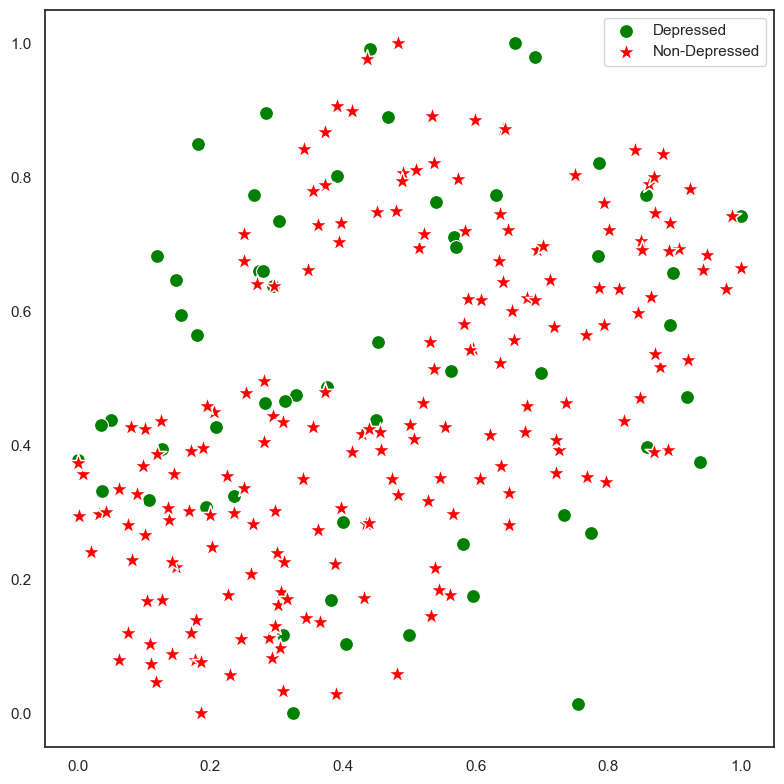

In [47]:
# Train T-SNE
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
class_column = 'labels'
# Create a t-SNE model with 2 components (you can change it to 3 if needed)
tsne = TSNE(n_components=2, random_state=0)
dep_samples = merged_df[merged_df[class_column] == 0].drop([class_column], axis=1)
nondep_samples = merged_df[merged_df[class_column] == 1].drop([class_column], axis=1)
# Fit the t-SNE model to your feature vectors
# X_tsne = tsne.fit_transform(X_train_new)
# X_tsne.shape
dep_tsne=tsne.fit_transform(dep_samples)
nondep_tsne=tsne.fit_transform(nondep_samples)
scaler = MinMaxScaler()
dep_scaled=scaler.fit_transform(dep_tsne)
nondep_scaled=scaler.fit_transform(nondep_tsne)
# X_tsne_normalized = scaler.fit_transform(X_tsne)
# Plot the t-SNE results
sns.set(style='white')
plt.figure(figsize=(8, 8))  # Square figure
sns.scatterplot(x=dep_scaled[:, 1], y=dep_scaled[:, 0], label='Depressed', color='green', marker='o', s=100, alpha=1.0)  # Circular markers with equal size
sns.scatterplot(x=nondep_scaled[:, 1], y=nondep_scaled[:, 0], label='Non-Depressed', color='red', marker='*', s=200, alpha=1.0)  # Slightly larger star markers
# plt.figure(figsize=(8, 6))
# plt.scatter(X_tsne_normalized[:, 0], X_tsne_normalized[:, 1], c=y_train, cmap=plt.cm.Paired)
# plt.title("t-SNE Plot of Feature Vectors")
# plt.colorbar()
# plt.show()
plt.legend()
plt.tight_layout()
plt.show()


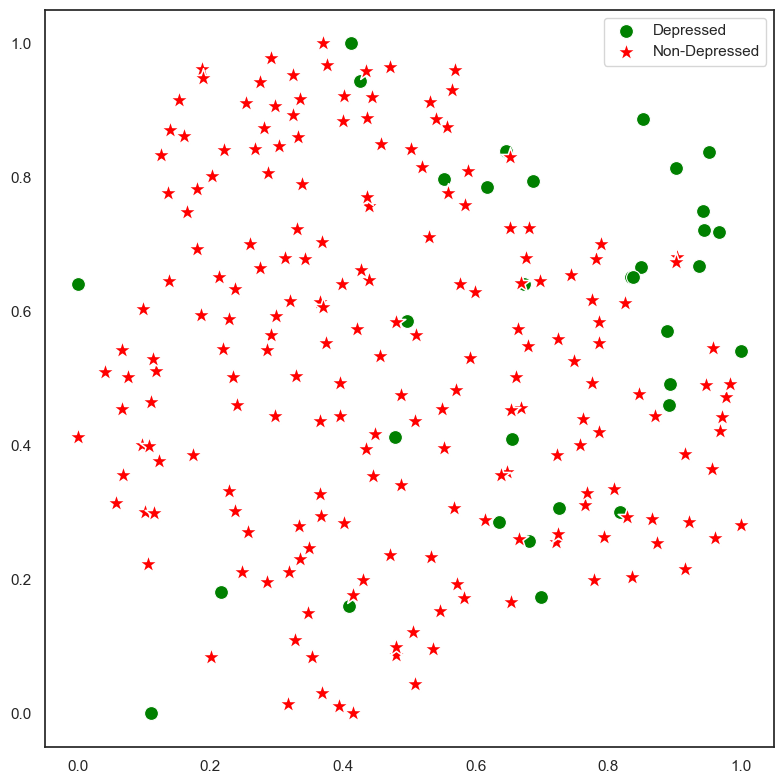

In [46]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
class_column = 'labels'
# Create a t-SNE model with 2 components (you can change it to 3 if needed)
tsne = TSNE(n_components=2, random_state=0)
dep_samples = merged_test[merged_test[class_column] == 0].drop([class_column], axis=1)
nondep_samples = merged_test[merged_test[class_column] == 1].drop([class_column], axis=1)
# Fit the t-SNE model to your feature vectors
# X_tsne = tsne.fit_transform(X_train_new)
# X_tsne.shape
dep_tsne=tsne.fit_transform(dep_samples)
nondep_tsne=tsne.fit_transform(nondep_samples)
scaler = MinMaxScaler()
dep_scaled=scaler.fit_transform(dep_tsne)
nondep_scaled=scaler.fit_transform(nondep_tsne)
# X_tsne_normalized = scaler.fit_transform(X_tsne)
# Plot the t-SNE results
sns.set(style='white')
plt.figure(figsize=(8, 8))  # Square figure
sns.scatterplot(x=dep_scaled[:, 1], y=dep_scaled[:, 0], label='Depressed', color='green', marker='o', s=100, alpha=1.0)  # Circular markers with equal size
sns.scatterplot(x=nondep_scaled[:, 1], y=nondep_scaled[:, 0], label='Non-Depressed', color='red', marker='*', s=200, alpha=1.0)  # Slightly larger star markers
# plt.figure(figsize=(8, 6))
# plt.scatter(X_tsne_normalized[:, 0], X_tsne_normalized[:, 1], c=y_train, cmap=plt.cm.Paired)
# plt.title("t-SNE Plot of Feature Vectors")
# plt.colorbar()
# plt.show()
plt.legend()
plt.tight_layout()
plt.show()

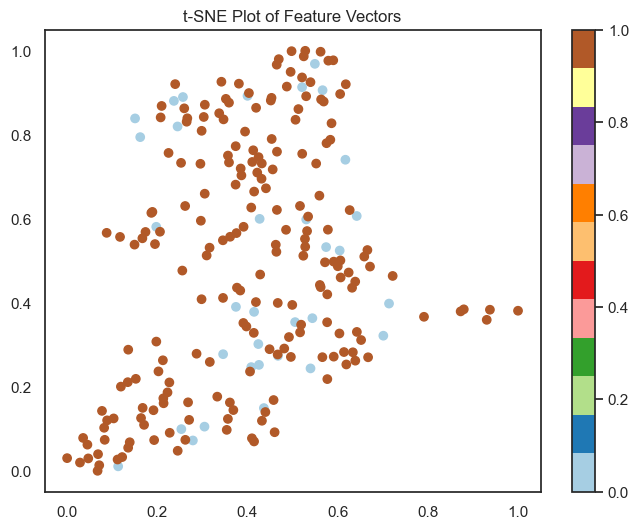

In [33]:
#test t-sne
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Create a t-SNE model with 2 components (you can change it to 3 if needed)
tsne = TSNE(n_components=2, random_state=0)

# Fit the t-SNE model to your feature vectors
X_tsne = tsne.fit_transform(X_test_new)
X_tsne.shape
scaler = MinMaxScaler()
X_tsne_normalized = scaler.fit_transform(X_tsne)
# Plot the t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne_normalized[:, 0], X_tsne_normalized[:, 1], c=y_test, cmap=plt.cm.Paired)
plt.title("t-SNE Plot of Feature Vectors")
plt.colorbar()
plt.show()


Negative values in Depressed samples: 2
Negative values in Non-Depressed samples: 8


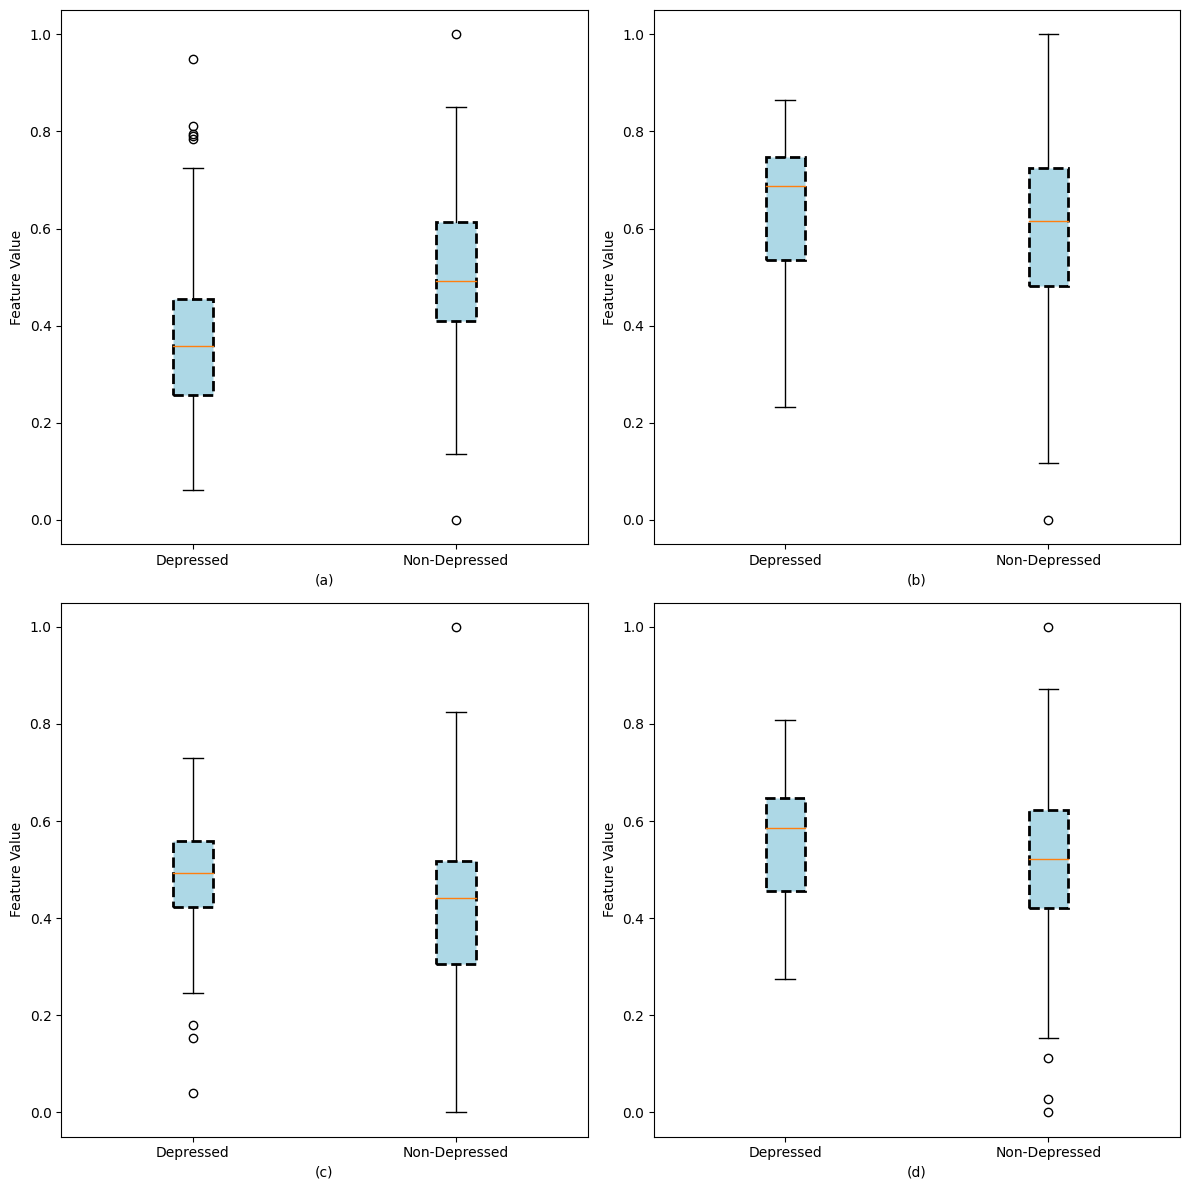

In [154]:
import seaborn as sns
import matplotlib.pyplot as plt

class_column = 'labels'
dep_samples = merged_df[merged_df[class_column] == 0].drop([class_column], axis=1)
nondep_samples = merged_df[merged_df[class_column] == 1].drop([class_column], axis=1)

# Neg_values
print("Neg_values in Depressed samples:", (dep_samples >= 1 ).sum().sum())
print("Neg_values in Non-Depressed samples:", (nondep_samples >=1).sum().sum())

#box_properties
boxprops = {'linewidth': 2, 'linestyle': 'dashed'}
boxprops_patch = {'facecolor': 'lightblue', 'linewidth': 2, 'linestyle': 'dashed'}

# Create an 8x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize=(12, 12))

# Flatten 
axes = axes.flatten()
lab = ["(a)", "(b)", "(c)", "(d)"]

feature_indices = [2, 4, 5, 7]


for i, feature_column in enumerate(feature_indices):
    if feature_column != class_column and i != 15:
       
        data_to_plot = [dep_samples.iloc[:, i], nondep_samples.iloc[:, i]]

        bplot = axes[i].boxplot(data_to_plot, labels=['Depressed', 'Non-Depressed'], patch_artist=True, boxprops=boxprops)
        
        for patch in bplot['boxes']:
            patch.set(**boxprops_patch)

        axes[i].set_xlabel(lab[i])
        axes[i].set_ylabel("Feature Value")
#         axes[i].set_ylim(0, 1)

plt.tight_layout()

plt.show()


In [139]:
nondep_samples

,0,1,2,3,4,5,6,7,8,9
0,0.410126,0.368622,0.524765,0.651520,0.930054,0.577347,0.592972,0.316696,0.163391,0.562637
1,0.829483,0.345078,0.087219,0.190308,0.606674,0.178513,0.487320,0.466293,1.000000,0.886658
2,0.645248,0.398834,0.601700,0.470627,0.244492,0.204239,0.444702,0.835190,0.562943,0.327316
3,0.602371,0.338409,0.825226,0.627197,0.729675,1.000000,0.788589,0.581863,0.197968,0.543335
4,0.758453,0.164886,0.574661,0.452866,0.555817,0.237930,0.252289,0.346451,0.595016,0.276627
...,...,...,...,...,...,...,...,...,...,...
242,0.421036,0.674713,0.439484,0.684845,0.492920,0.310272,0.664597,0.580612,0.540207,0.501450
243,0.469650,0.654633,0.473801,0.690414,0.595398,0.208954,0.635605,0.728226,0.607315,0.996841
244,0.175018,0.504135,0.678894,0.516357,0.606476,0.427643,0.645645,0.658752,0.380798,0.335388
245,0.472061,0.654434,0.455246,0.543991,0.662933,0.485809,0.654633,0.542755,0.468582,0.434570


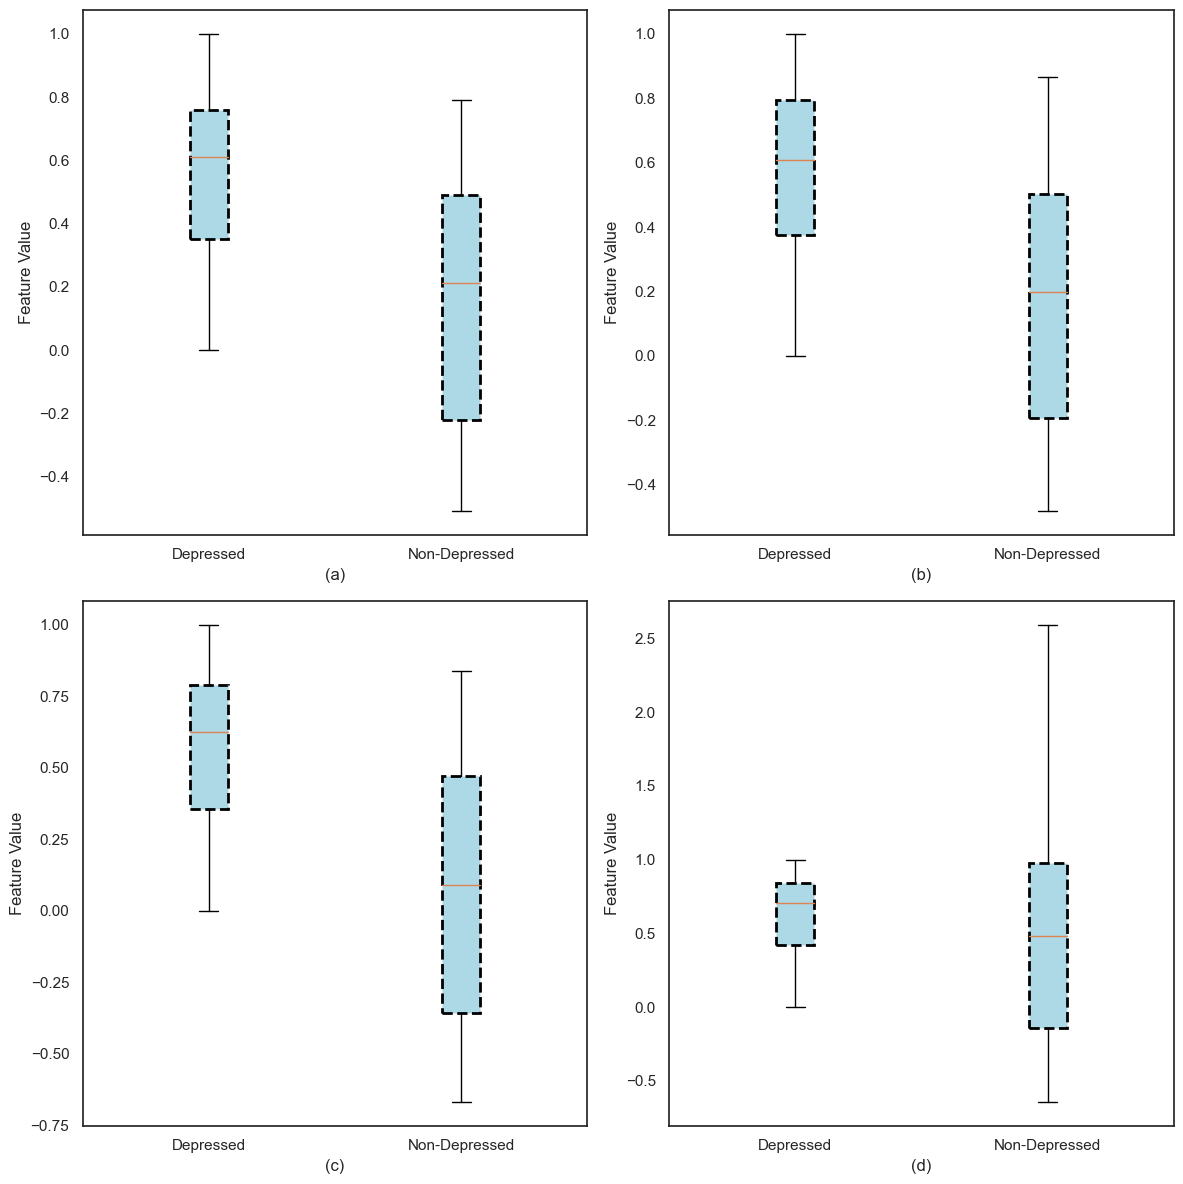

In [301]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


class_column = 'labels'
dep_samples = merged_df[merged_df[class_column] == 0].drop([class_column], axis=1)
nondep_samples = merged_df[merged_df[class_column] == 1].drop([class_column], axis=1)

scaler = MinMaxScaler()
dep_samples_scaled = scaler.fit_transform(dep_samples)
nondep_samples_scaled = scaler.transform(nondep_samples)
nondep_samples_scaled = scaler.transform(nondep_samples_scaled)

boxprops = {'linewidth': 2, 'linestyle': 'dashed'}
boxprops_patch = {'facecolor': 'lightblue', 'linewidth': 2, 'linestyle': 'dashed'}

fig, axes = plt.subplots(2, 2, figsize=(12, 12))

axes = axes.flatten()
lab = ["(a)", "(b)", "(c)", "(d)"]


feature_indices = [2, 4, 5, 7]


for i, feature_column in enumerate(feature_indices):
    if feature_column != class_column and i != 15:
       
        data_to_plot = [dep_samples_scaled[:, i], nondep_samples_scaled[:, i]]

        
        bplot = axes[i].boxplot(data_to_plot, labels=['Depressed', 'Non-Depressed'], patch_artist=True, boxprops=boxprops)

       
        for patch in bplot['boxes']:
            patch.set(**boxprops_patch)

        axes[i].set_xlabel(lab[i])
        axes[i].set_ylabel("Feature Value")


plt.tight_layout()


plt.show()


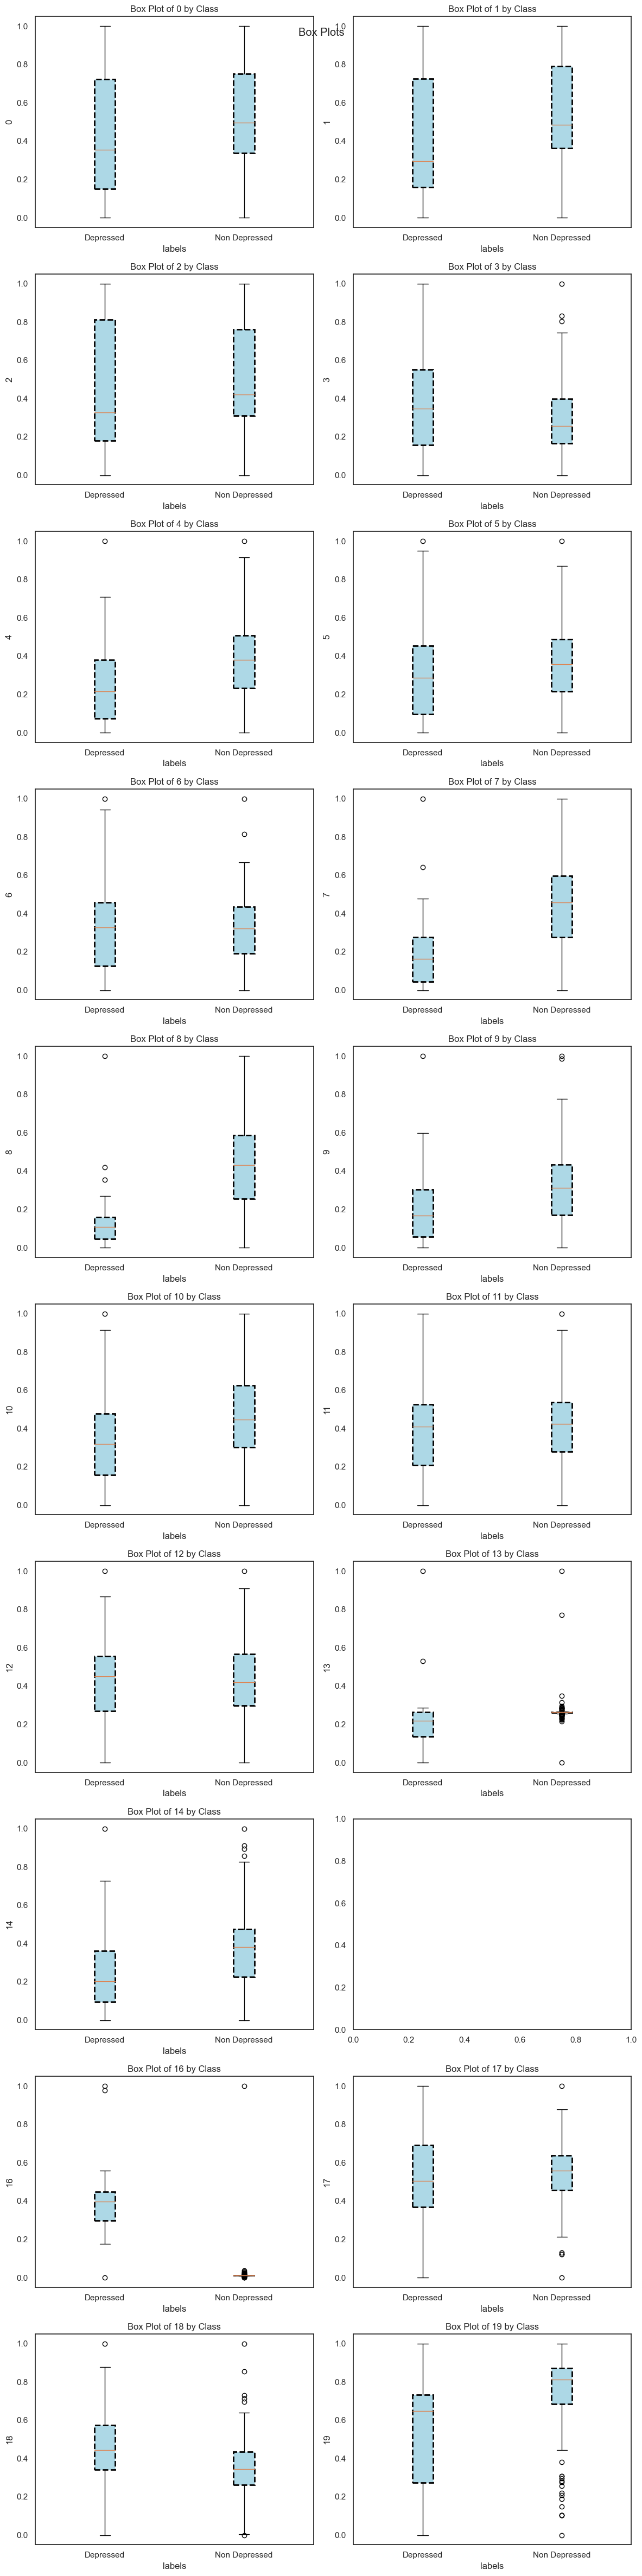

In [285]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler


class_column = 'labels'
dep_samples = merged_test[merged_test[class_column] == 0].drop([class_column], axis=1)
nondep_samples = merged_test[merged_test[class_column] == 1].drop([class_column], axis=1)


scaler = MinMaxScaler()
dep_samples = scaler.fit_transform(dep_samples)
nondep_samples = scaler.fit_transform(nondep_samples)


boxprops = {'linewidth': 2, 'linestyle': 'dashed'}
boxprops_patch = {'facecolor': 'lightblue', 'linewidth': 2, 'linestyle': 'dashed'}


fig, axes = plt.subplots(10, 2, figsize=(12, 48))
fig.suptitle("Box Plots")


axes = axes.flatten()


for i, feature_column in enumerate(merged_df.columns):
    if feature_column != class_column and i != 15:
  
        data_to_plot = [dep_samples[:, i], nondep_samples[:, i]]
        
 
        bplot = axes[i].boxplot(data_to_plot, labels=['Depressed', 'Non Depressed'], patch_artist=True, boxprops=boxprops)
        

        for patch in bplot['boxes']:
            patch.set(**boxprops_patch)
        
        axes[i].set_title(f"Box Plot of {feature_column} by Class")
        axes[i].set_xlabel(class_column)
        axes[i].set_ylabel(feature_column)


plt.tight_layout()


plt.show()


In [194]:
etc=ExtraTreesClassifier(n_estimators=150,verbose=True)
etc=etc.fit(X_train_new, y_train)
th=-np.sort(-etc.feature_importances_)[3]
res = [idx for idx, val in enumerate(etc.feature_importances_) if val >= th]
res=np.asarray(res)
res.T
X_train_new=(X_train[:,res])
X_test_new=X_test[:,res]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


In [195]:
X_test_new

array([[4.62577820e+00, 4.80921555e+01, 1.82000852e+00, 3.81998941e-02],
       [3.45546341e+00, 1.35492706e+02, 8.51297736e-01, 3.24152768e-01],
       [2.84075546e+00, 2.91678009e+02, 1.03901768e+00, 1.18592255e-01],
       [1.15898628e+01, 6.46007202e+02, 8.36608589e-01, 4.06534702e-01],
       [4.25881958e+00, 3.19254761e+02, 1.28659832e+00, 1.48943424e-01],
       [1.95263195e+01, 7.83885132e+02, 1.08450091e+00, 9.56448540e-02],
       [3.27883339e+00, 6.96860107e+02, 8.77953470e-01, 1.69958591e-01],
       [2.30016708e+00, 8.00131683e+01, 6.70332015e-01, 4.79101628e-01],
       [1.92327499e+00, 1.19574792e+03, 6.88146889e-01, 2.40946114e-01],
       [3.61782265e+00, 1.23135849e+02, 7.38106132e-01, 4.56365734e-01],
       [6.46602631e+00, 1.80461060e+02, 6.69907928e-01, 1.25111043e+00],
       [2.14845276e+00, 1.06748877e+01, 1.65798700e+00, 3.34545635e-02],
       [4.30492020e+00, 6.76495483e+02, 9.70655560e-01, 3.38454753e-01],
       [2.81586456e+00, 6.24939392e+02, 8.95864189e

# Train Resample

In [109]:
X_train_new, y_train = oversample.fit_resample(X_train_new, y_train)

In [71]:
X_train_new1, y_train1 =undersample.fit_resample(X_train_new, y_train)

In [110]:
X_train_new=X_train_new
y_train_new=y_train

In [114]:
n1=y_train.count(0)
n2=y_train.count(1)
if(n1==n2):
    print("Resampled")
else:
    print("n1:",n1," ,n2: ",n2)

Resampled


In [115]:
n3=y_train.count(0)
n4=y_train.count(1)
print(n3,n4)

191 191


# Test resample


In [87]:
X_test_new, y_test_new =undersample.fit_resample(X_test_new, y_test)

In [112]:
n1=y_test_new.count(0)
n2=y_test_new.count(1)
if(n1==n2):
    print("Resampled")
else:
    print("n1:",n1," ,n2: ",n2)

Resampled


In [113]:
print("Hi ",n1," days")

Hi  200  days


# Test Oversample

In [111]:
X_test_new, y_test_new =oversample.fit_resample(X_test_new, y_test)

# Decision Tree Without K-fold Cross Validation

In [116]:
from sklearn.metrics import classification_report
from sklearn import metrics

In [117]:
import matplotlib.pyplot as plt

[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
Utterance level accuracy:  0.52
0.6033057851239669
              precision    recall  f1-score   support

      class0       0.53      0.31      0.39       200
      class1       0.51      0.73      0.60       200

    accuracy                           0.52       400
   macro avg       0.52      0.52      0.50       400
weighted avg       0.52      0.52      0.50       400



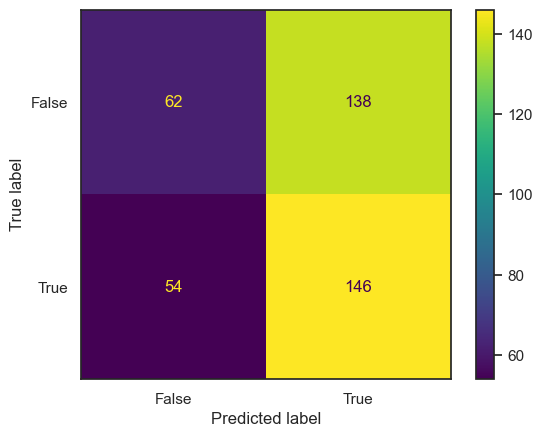

In [122]:
pipe2 = Pipeline([ ('std', StandardScaler()), ('decision_tree', DecisionTreeClassifier())], verbose = True)

# fitting the data in the pipe
pipe2.fit(X_train_new, y_train)

prob_score2=pipe2.predict_proba(X_test_new)

print("Utterance level accuracy: ",accuracy_score(y_test, pipe2.predict(X_test_new)))
# accuracy(y_test, prob_score2, s_test)
print(sklearn.metrics.f1_score(y_test, pipe2.predict(X_test_new)))
print(classification_report(y_test, pipe2.predict(X_test_new),target_names=["class0","class1"]))
confusion_matrix = metrics.confusion_matrix(y_test, pipe2.predict(X_test_new))
dt_score=pipe2.predict_proba(X_test_new)
# print("dt_score is ",dt_score)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

# Random forest (No Need of K-fold cross validation)


[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
Utterance level accuracy:  0.5175
0.6295585412667946
              precision    recall  f1-score   support

      class0       0.54      0.21      0.31       200
      class1       0.51      0.82      0.63       200

    accuracy                           0.52       400
   macro avg       0.53      0.52      0.47       400
weighted avg       0.53      0.52      0.47       400



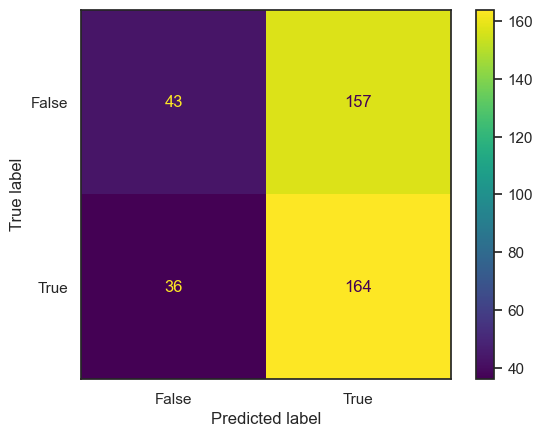

In [124]:
pipe1 = Pipeline([ ('std', StandardScaler()), ('Random_forest', RandomForestClassifier(n_estimators = 150))], verbose = True)

# fitting the data in the pipe
pipe1.fit(X_train_new, y_train)

prob_score=pipe1.predict_proba(X_test_new)
print("Utterance level accuracy: ", accuracy_score(y_test, pipe1.predict(X_test_new)))
# accuracy(y_test, prob_score, s_test)
print(sklearn.metrics.f1_score(y_test, pipe1.predict(X_test_new)))
print(classification_report(y_test, pipe1.predict(X_test_new),target_names=["class0","class1"]))
rf_score=prob_score
# print(rf_score)
confusion_matrix = metrics.confusion_matrix(y_test, pipe1.predict(X_test_new))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

### Possible Conclusion for Decision Tree, 5 Fold Validated Decision Tree and Random Forest:
1. After performing 5-fold cross validation on a decision tree model, both utterance and speaker level accuracy
   slightly improved. However, the F1 score in both the decision tree models remain same.
2. Speaker level accuracy is better in case of decision tree after 5-fold cross validation compared to speaker level accuracy in case of Random Forest. However, utterance level accuracy is better in case of Random forest.
3. The F1 score in case of all the three models remain the same.

# Support Vector Machine

In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sklearn modules & classes
from sklearn.linear_model import Perceptron, LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn import metrics



In [126]:
# Instantiate the Support Vector Classifier (SVC)
svc = SVC(C=1.0, random_state=1, kernel='linear',probability=True)

# Fit the model
svc.fit(X_train_new, y_train)

SVC(kernel='linear', probability=True, random_state=1)

[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
Utterance level accuracy:  0.505
0.5
              precision    recall  f1-score   support

      class0       0.50      0.52      0.51       200
      class1       0.51      0.49      0.50       200

    accuracy                           0.51       400
   macro avg       0.51      0.51      0.50       400
weighted avg       0.51      0.51      0.50       400



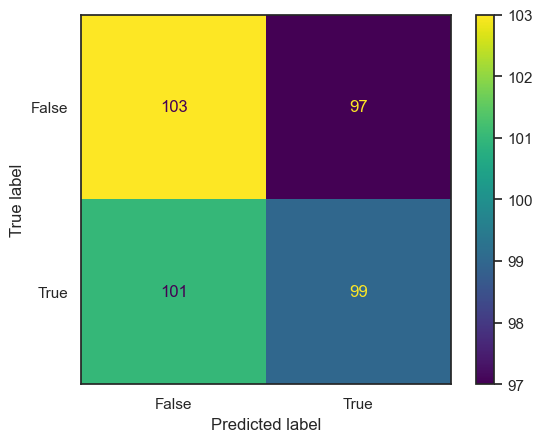

In [128]:
pipe1 = Pipeline([ ('std', StandardScaler()), ('SVC', SVC(C=1.0, random_state=1, kernel='linear', probability=True))], verbose = True)

# fitting the data in the pipe
pipe1.fit(X_train_new, y_train)

prob_score=pipe1.predict_proba(X_test_new)
print("Utterance level accuracy: ", accuracy_score(y_test, pipe1.predict(X_test_new)))
# accuracy(y_test, prob_score, s_test)
print(sklearn.metrics.f1_score(y_test, pipe1.predict(X_test_new)))
print(classification_report(y_test, pipe1.predict(X_test_new),target_names=["class0","class1"]))
svc_score=prob_score
# print(svc_score)
confusion_matrix = metrics.confusion_matrix(y_test, pipe1.predict(X_test_new))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

## Logistic Regression

In [129]:
from sklearn import linear_model

In [130]:
logr = linear_model.LogisticRegression(max_iter=10000)
logr.fit(X_train_new,y_train)

LogisticRegression(max_iter=10000)

[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s
Utterance level accuracy:  0.4875
0.5153664302600474
              precision    recall  f1-score   support

      class0       0.49      0.43      0.46       200
      class1       0.49      0.55      0.52       200

    accuracy                           0.49       400
   macro avg       0.49      0.49      0.49       400
weighted avg       0.49      0.49      0.49       400



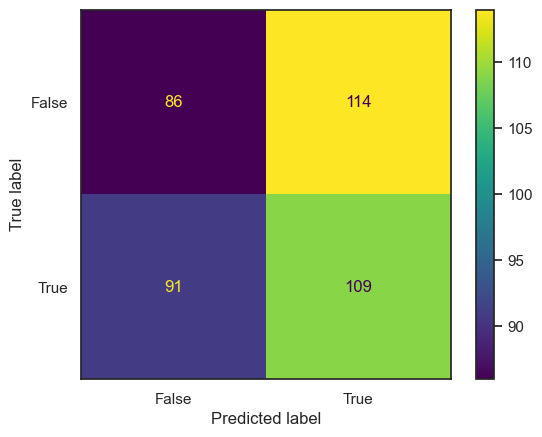

In [131]:
pipe1 = Pipeline([ ('std', StandardScaler()), ('LR', linear_model.LogisticRegression())], verbose = True)

# fitting the data in the pipe
pipe1.fit(X_train_new, y_train)

prob_score=pipe1.predict_proba(X_test_new)
print("Utterance level accuracy: ", accuracy_score(y_test, pipe1.predict(X_test_new)))
# accuracy(y_test, prob_score, s_test)
print(sklearn.metrics.f1_score(y_test, pipe1.predict(X_test_new)))
print(classification_report(y_test, pipe1.predict(X_test_new),target_names=["class0","class1"]))
lr_score=prob_score
# print(lr_score)
confusion_matrix = metrics.confusion_matrix(y_test, pipe1.predict(X_test_new))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
cm_display.plot()
plt.show()

## XGBoost

[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing XGB, total=   0.0s
Utterance level accuracy:  0.6738197424892703
F1 Score:  0.8
              precision    recall  f1-score   support

      class0       0.09      0.15      0.12        33
      class1       0.84      0.76      0.80       200

    accuracy                           0.67       233
   macro avg       0.47      0.46      0.46       233
weighted avg       0.74      0.67      0.70       233



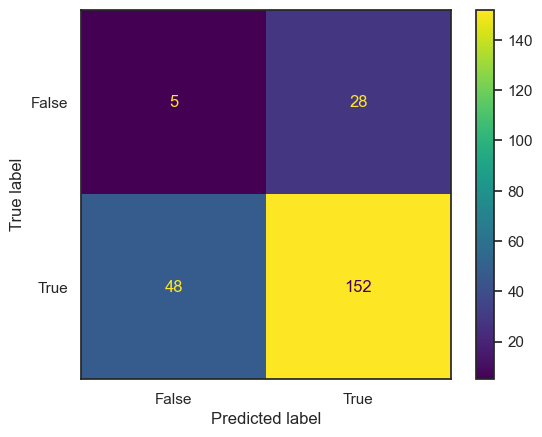

In [567]:
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import sklearn.metrics

# Create a pipeline with XGBoost
pipe1 = Pipeline([
    ('std', StandardScaler()),  # StandardScaler for feature scaling (if needed)
    ('XGB', XGBClassifier())    # XGBoost classifier
], verbose=True)

# Fit the data in the pipeline
pipe1.fit(X_train_new, y_train)

# Predict probabilities and evaluate the model
prob_score = pipe1.predict_proba(X_test_new)
print("Utterance level accuracy: ", accuracy_score(y_test, pipe1.predict(X_test_new)))
print("F1 Score: ", f1_score(y_test, pipe1.predict(X_test_new)))
print(classification_report(y_test, pipe1.predict(X_test_new), target_names=["class0", "class1"]))

# Plot the confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, pipe1.predict(X_test_new))
cm_display = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix, display_labels=[False, True])
cm_display.plot()
plt.show()

# Score Calculation

In [405]:
score=dt_score+rf_score+svc_score+lr_score

In [406]:
final_predictions = np.argmax(score, axis=1)
final_predictions

array([1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,

## Iterating over different number of features(Auto Encoders)

------------------
DT for  0  features encoding
------------------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
Utterance level accuracy:  0.48484848484848486
0.6304347826086957
              precision    recall  f1-score   support

      class0       0.43      0.09      0.15        33
      class1       0.49      0.88      0.63        33

    accuracy                           0.48        66
   macro avg       0.46      0.48      0.39        66
weighted avg       0.46      0.48      0.39        66



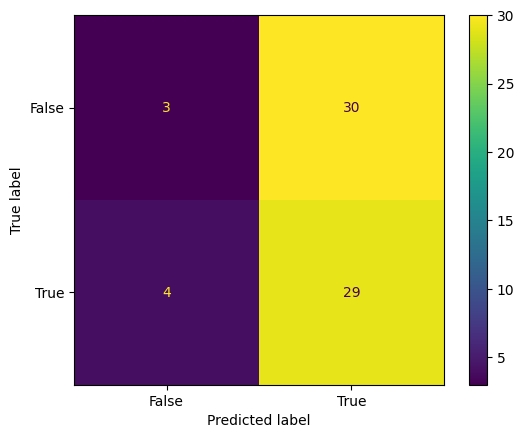

-------------------
SVC for  0  features encoding
--------------------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.1s
Utterance level accuracy:  0.5
0.6666666666666666
              precision    recall  f1-score   support

      class0       0.00      0.00      0.00        33
      class1       0.50      1.00      0.67        33

    accuracy                           0.50        66
   macro avg       0.25      0.50      0.33        66
weighted avg       0.25      0.50      0.33        66



C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


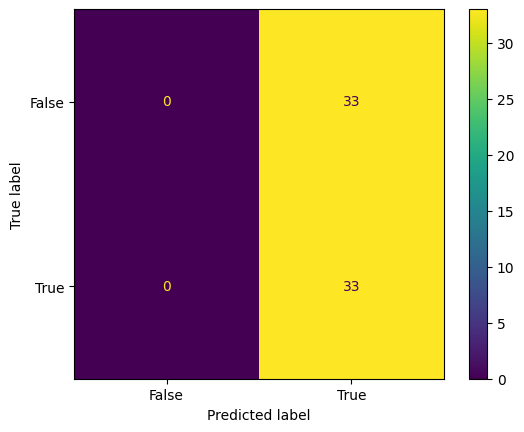

----------------------
Iteration over proceeding over to next
-----------------------
------------------
DT for  5  features encoding
------------------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
Utterance level accuracy:  0.5
0.6597938144329897
              precision    recall  f1-score   support

      class0       0.50      0.03      0.06        33
      class1       0.50      0.97      0.66        33

    accuracy                           0.50        66
   macro avg       0.50      0.50      0.36        66
weighted avg       0.50      0.50      0.36        66



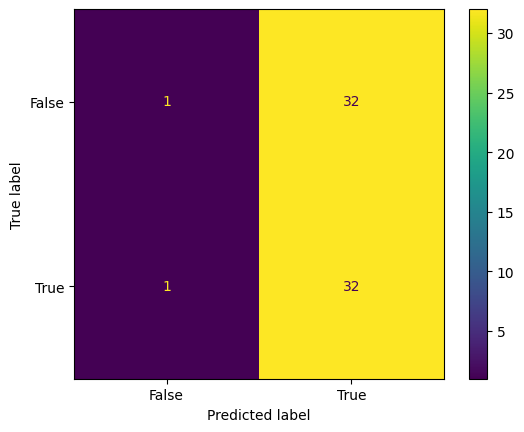

-------------------
SVC for  5  features encoding
--------------------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.1s
Utterance level accuracy:  0.5
0.6666666666666666
              precision    recall  f1-score   support

      class0       0.00      0.00      0.00        33
      class1       0.50      1.00      0.67        33

    accuracy                           0.50        66
   macro avg       0.25      0.50      0.33        66
weighted avg       0.25      0.50      0.33        66



C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


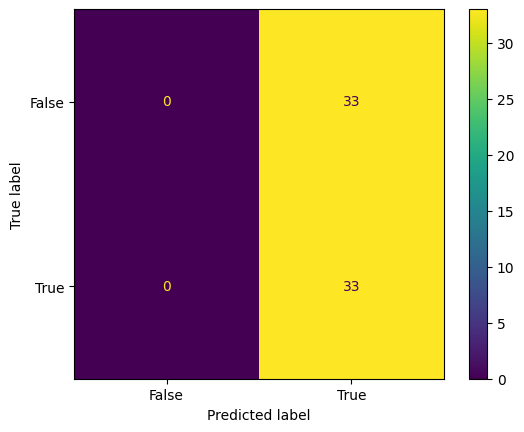

----------------------
Iteration over proceeding over to next
-----------------------
------------------
DT for  10  features encoding
------------------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
Utterance level accuracy:  0.4696969696969697
0.5333333333333333
              precision    recall  f1-score   support

      class0       0.46      0.33      0.39        33
      class1       0.48      0.61      0.53        33

    accuracy                           0.47        66
   macro avg       0.47      0.47      0.46        66
weighted avg       0.47      0.47      0.46        66



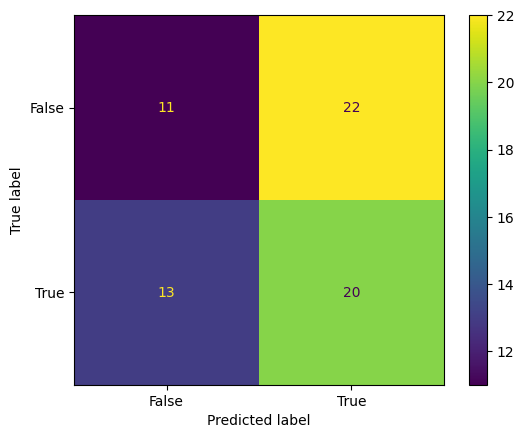

-------------------
SVC for  10  features encoding
--------------------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.1s
Utterance level accuracy:  0.5
0.6666666666666666
              precision    recall  f1-score   support

      class0       0.00      0.00      0.00        33
      class1       0.50      1.00      0.67        33

    accuracy                           0.50        66
   macro avg       0.25      0.50      0.33        66
weighted avg       0.25      0.50      0.33        66



C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


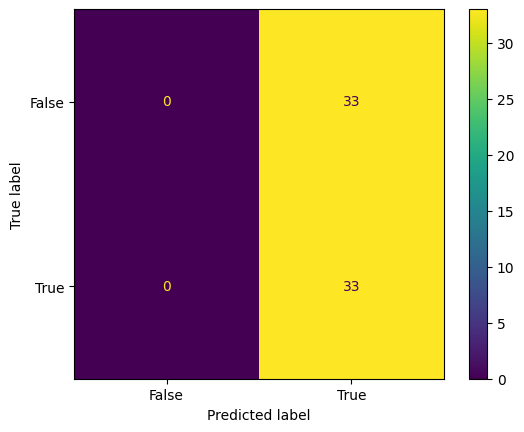

----------------------
Iteration over proceeding over to next
-----------------------
------------------
DT for  15  features encoding
------------------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
Utterance level accuracy:  0.5303030303030303
0.6736842105263158
              precision    recall  f1-score   support

      class0       0.75      0.09      0.16        33
      class1       0.52      0.97      0.67        33

    accuracy                           0.53        66
   macro avg       0.63      0.53      0.42        66
weighted avg       0.63      0.53      0.42        66



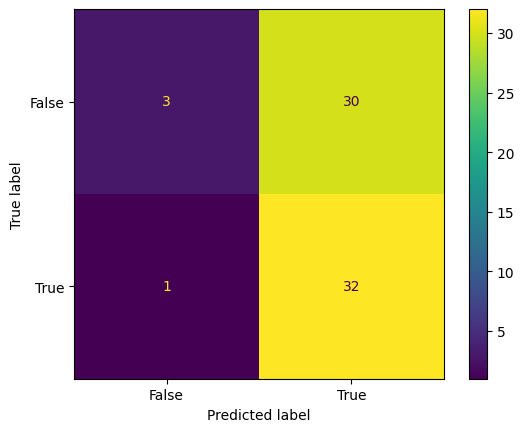

-------------------
SVC for  15  features encoding
--------------------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.1s
Utterance level accuracy:  0.5
0.6666666666666666
              precision    recall  f1-score   support

      class0       0.00      0.00      0.00        33
      class1       0.50      1.00      0.67        33

    accuracy                           0.50        66
   macro avg       0.25      0.50      0.33        66
weighted avg       0.25      0.50      0.33        66



C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


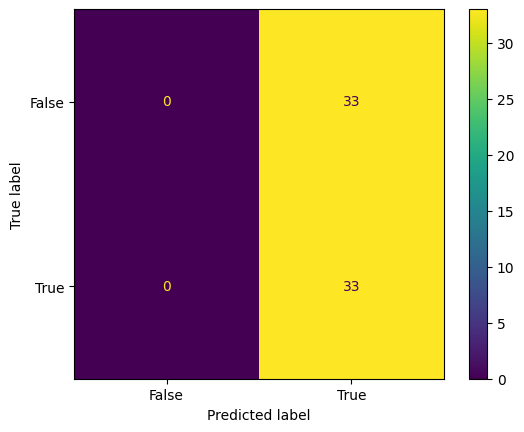

----------------------
Iteration over proceeding over to next
-----------------------
------------------
DT for  20  features encoding
------------------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
Utterance level accuracy:  0.45454545454545453
0.6086956521739131
              precision    recall  f1-score   support

      class0       0.29      0.06      0.10        33
      class1       0.47      0.85      0.61        33

    accuracy                           0.45        66
   macro avg       0.38      0.45      0.35        66
weighted avg       0.38      0.45      0.35        66



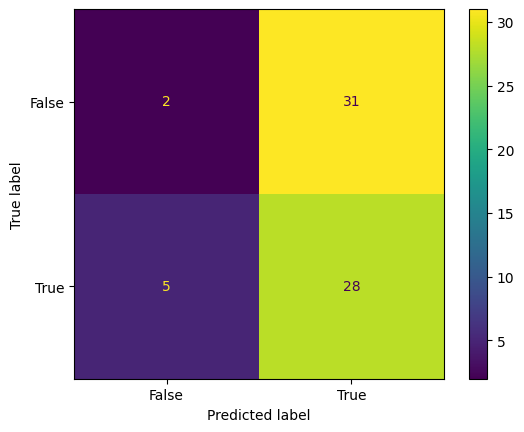

-------------------
SVC for  20  features encoding
--------------------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.1s
Utterance level accuracy:  0.5
0.6666666666666666
              precision    recall  f1-score   support

      class0       0.00      0.00      0.00        33
      class1       0.50      1.00      0.67        33

    accuracy                           0.50        66
   macro avg       0.25      0.50      0.33        66
weighted avg       0.25      0.50      0.33        66



C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


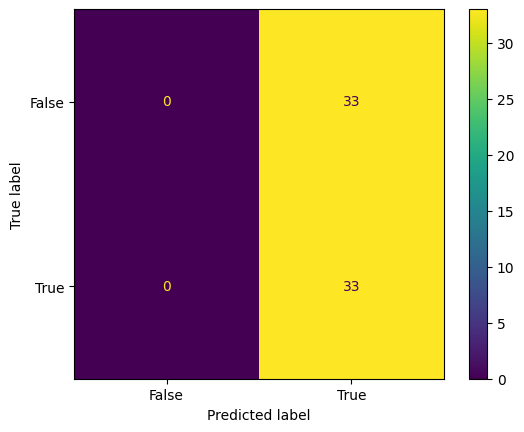

----------------------
Iteration over proceeding over to next
-----------------------
------------------
DT for  25  features encoding
------------------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
Utterance level accuracy:  0.5151515151515151
0.6595744680851064
              precision    recall  f1-score   support

      class0       0.60      0.09      0.16        33
      class1       0.51      0.94      0.66        33

    accuracy                           0.52        66
   macro avg       0.55      0.52      0.41        66
weighted avg       0.55      0.52      0.41        66



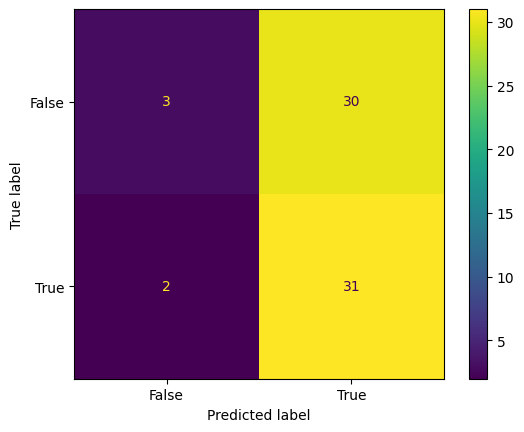

-------------------
SVC for  25  features encoding
--------------------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.1s
Utterance level accuracy:  0.5
0.6666666666666666
              precision    recall  f1-score   support

      class0       0.00      0.00      0.00        33
      class1       0.50      1.00      0.67        33

    accuracy                           0.50        66
   macro avg       0.25      0.50      0.33        66
weighted avg       0.25      0.50      0.33        66



C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


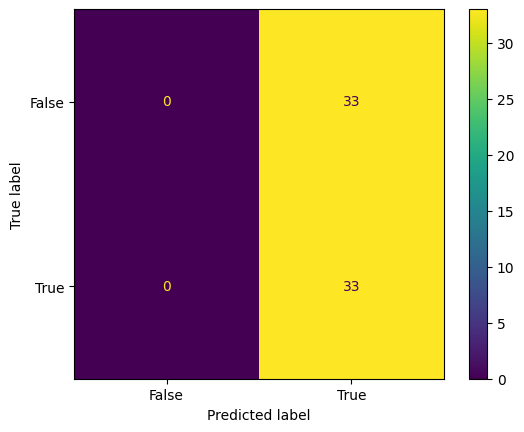

----------------------
Iteration over proceeding over to next
-----------------------
------------------
DT for  30  features encoding
------------------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
Utterance level accuracy:  0.4696969696969697
0.631578947368421
              precision    recall  f1-score   support

      class0       0.25      0.03      0.05        33
      class1       0.48      0.91      0.63        33

    accuracy                           0.47        66
   macro avg       0.37      0.47      0.34        66
weighted avg       0.37      0.47      0.34        66



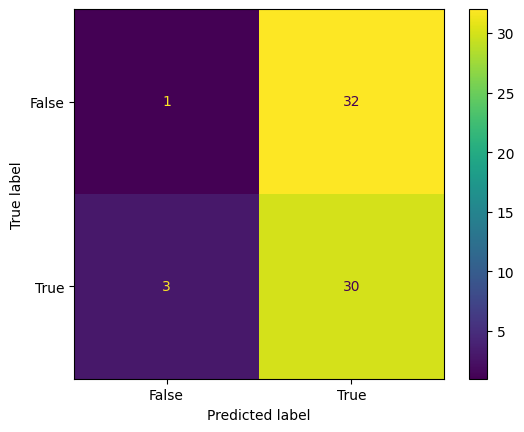

-------------------
SVC for  30  features encoding
--------------------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.1s
Utterance level accuracy:  0.5
0.6666666666666666
              precision    recall  f1-score   support

      class0       0.00      0.00      0.00        33
      class1       0.50      1.00      0.67        33

    accuracy                           0.50        66
   macro avg       0.25      0.50      0.33        66
weighted avg       0.25      0.50      0.33        66



C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


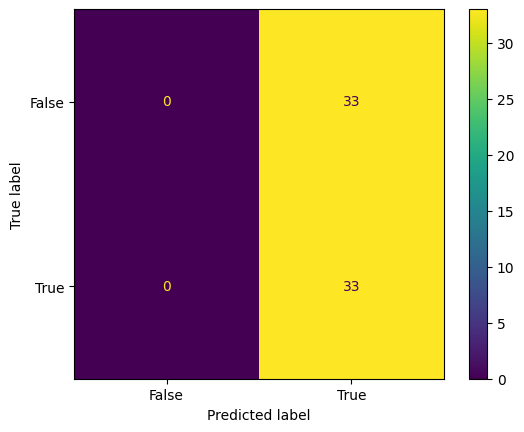

----------------------
Iteration over proceeding over to next
-----------------------
------------------
DT for  35  features encoding
------------------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
Utterance level accuracy:  0.5
0.6666666666666666
              precision    recall  f1-score   support

      class0       0.00      0.00      0.00        33
      class1       0.50      1.00      0.67        33

    accuracy                           0.50        66
   macro avg       0.25      0.50      0.33        66
weighted avg       0.25      0.50      0.33        66



C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


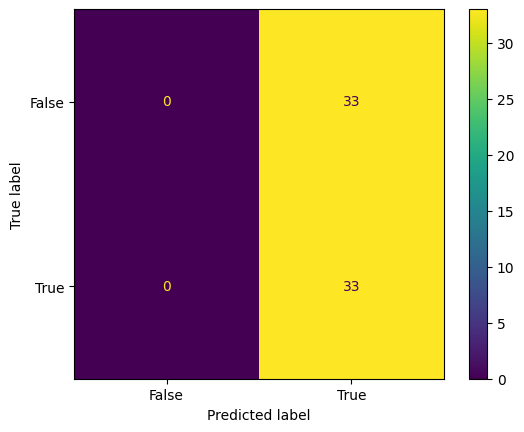

-------------------
SVC for  35  features encoding
--------------------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.1s
Utterance level accuracy:  0.5
0.6666666666666666
              precision    recall  f1-score   support

      class0       0.00      0.00      0.00        33
      class1       0.50      1.00      0.67        33

    accuracy                           0.50        66
   macro avg       0.25      0.50      0.33        66
weighted avg       0.25      0.50      0.33        66



C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


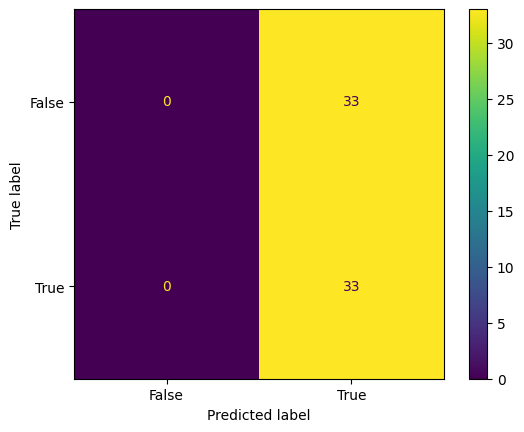

----------------------
Iteration over proceeding over to next
-----------------------
------------------
DT for  40  features encoding
------------------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
Utterance level accuracy:  0.48484848484848486
0.653061224489796
              precision    recall  f1-score   support

      class0       0.00      0.00      0.00        33
      class1       0.49      0.97      0.65        33

    accuracy                           0.48        66
   macro avg       0.25      0.48      0.33        66
weighted avg       0.25      0.48      0.33        66



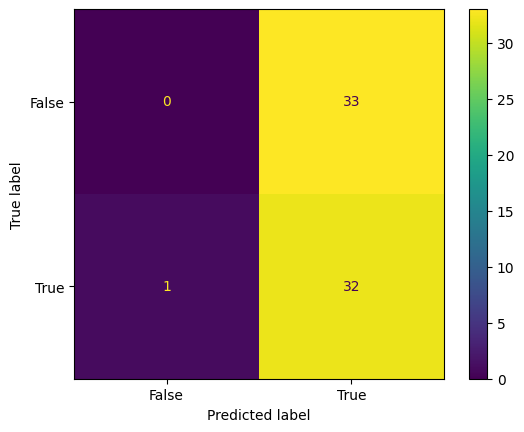

-------------------
SVC for  40  features encoding
--------------------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.1s
Utterance level accuracy:  0.5
0.6666666666666666
              precision    recall  f1-score   support

      class0       0.00      0.00      0.00        33
      class1       0.50      1.00      0.67        33

    accuracy                           0.50        66
   macro avg       0.25      0.50      0.33        66
weighted avg       0.25      0.50      0.33        66



C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


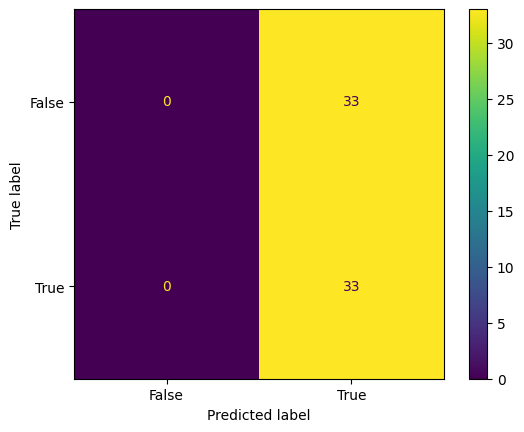

----------------------
Iteration over proceeding over to next
-----------------------
------------------
DT for  45  features encoding
------------------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
Utterance level accuracy:  0.5454545454545454
0.625
              precision    recall  f1-score   support

      class0       0.58      0.33      0.42        33
      class1       0.53      0.76      0.62        33

    accuracy                           0.55        66
   macro avg       0.56      0.55      0.52        66
weighted avg       0.56      0.55      0.52        66



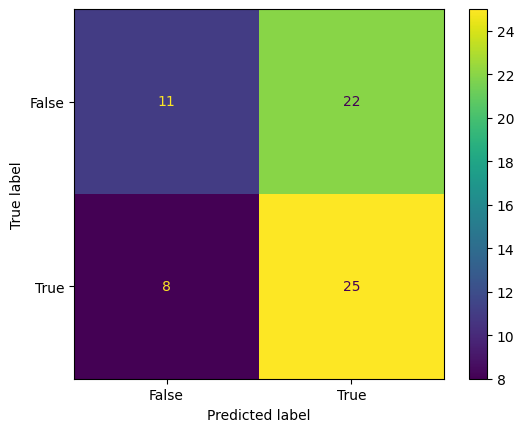

-------------------
SVC for  45  features encoding
--------------------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.1s
Utterance level accuracy:  0.5
0.6666666666666666
              precision    recall  f1-score   support

      class0       0.00      0.00      0.00        33
      class1       0.50      1.00      0.67        33

    accuracy                           0.50        66
   macro avg       0.25      0.50      0.33        66
weighted avg       0.25      0.50      0.33        66



C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


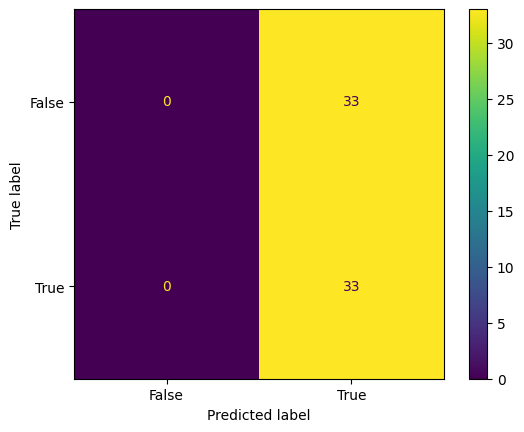

----------------------
Iteration over proceeding over to next
-----------------------
------------------
DT for  50  features encoding
------------------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
Utterance level accuracy:  0.5
0.6117647058823529
              precision    recall  f1-score   support

      class0       0.50      0.21      0.30        33
      class1       0.50      0.79      0.61        33

    accuracy                           0.50        66
   macro avg       0.50      0.50      0.45        66
weighted avg       0.50      0.50      0.45        66



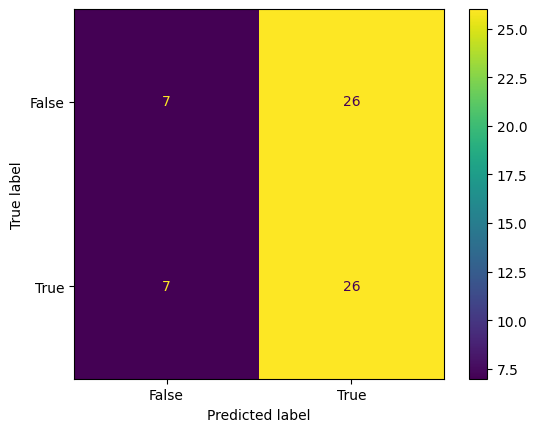

-------------------
SVC for  50  features encoding
--------------------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.1s
Utterance level accuracy:  0.5
0.6666666666666666
              precision    recall  f1-score   support

      class0       0.00      0.00      0.00        33
      class1       0.50      1.00      0.67        33

    accuracy                           0.50        66
   macro avg       0.25      0.50      0.33        66
weighted avg       0.25      0.50      0.33        66



C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


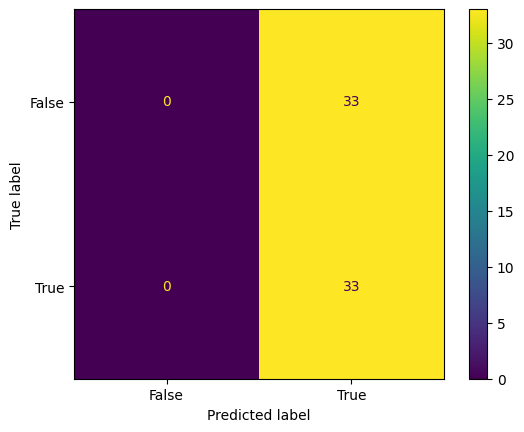

----------------------
Iteration over proceeding over to next
-----------------------
------------------
DT for  55  features encoding
------------------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
Utterance level accuracy:  0.4696969696969697
0.5882352941176471
              precision    recall  f1-score   support

      class0       0.43      0.18      0.26        33
      class1       0.48      0.76      0.59        33

    accuracy                           0.47        66
   macro avg       0.45      0.47      0.42        66
weighted avg       0.45      0.47      0.42        66



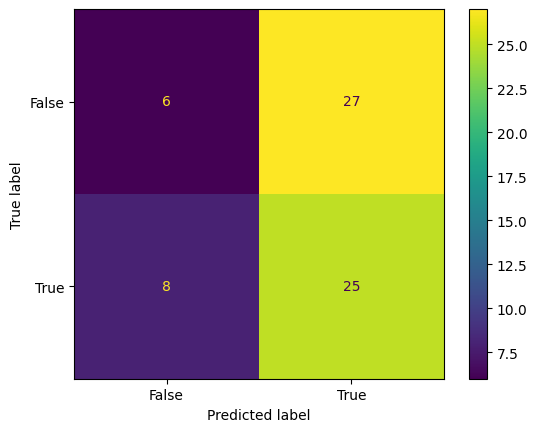

-------------------
SVC for  55  features encoding
--------------------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.1s
Utterance level accuracy:  0.5
0.6666666666666666
              precision    recall  f1-score   support

      class0       0.00      0.00      0.00        33
      class1       0.50      1.00      0.67        33

    accuracy                           0.50        66
   macro avg       0.25      0.50      0.33        66
weighted avg       0.25      0.50      0.33        66



C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


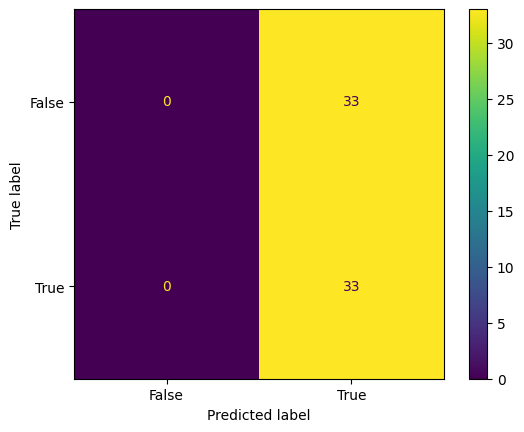

----------------------
Iteration over proceeding over to next
-----------------------
------------------
DT for  60  features encoding
------------------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
Utterance level accuracy:  0.5151515151515151
0.6666666666666666
              precision    recall  f1-score   support

      class0       0.67      0.06      0.11        33
      class1       0.51      0.97      0.67        33

    accuracy                           0.52        66
   macro avg       0.59      0.52      0.39        66
weighted avg       0.59      0.52      0.39        66



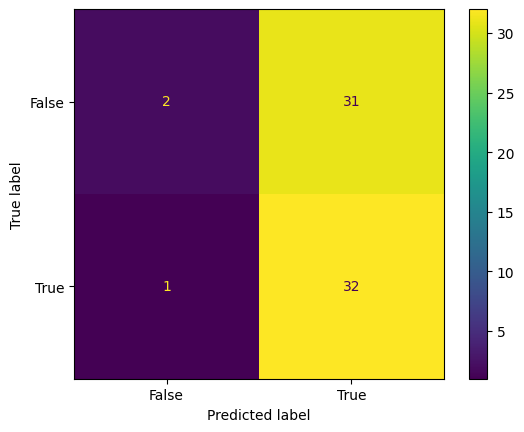

-------------------
SVC for  60  features encoding
--------------------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.1s
Utterance level accuracy:  0.5
0.6666666666666666
              precision    recall  f1-score   support

      class0       0.00      0.00      0.00        33
      class1       0.50      1.00      0.67        33

    accuracy                           0.50        66
   macro avg       0.25      0.50      0.33        66
weighted avg       0.25      0.50      0.33        66



C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


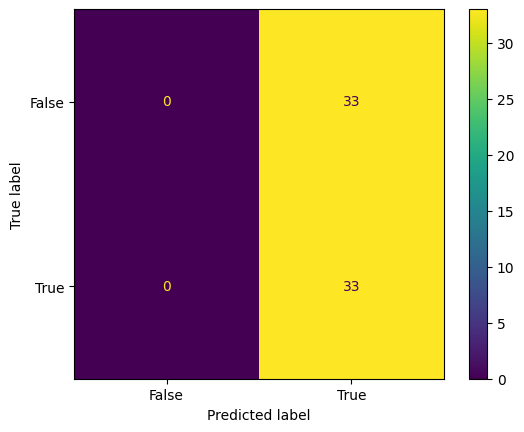

----------------------
Iteration over proceeding over to next
-----------------------
------------------
DT for  65  features encoding
------------------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
Utterance level accuracy:  0.45454545454545453
0.5909090909090909
              precision    recall  f1-score   support

      class0       0.36      0.12      0.18        33
      class1       0.47      0.79      0.59        33

    accuracy                           0.45        66
   macro avg       0.42      0.45      0.39        66
weighted avg       0.42      0.45      0.39        66



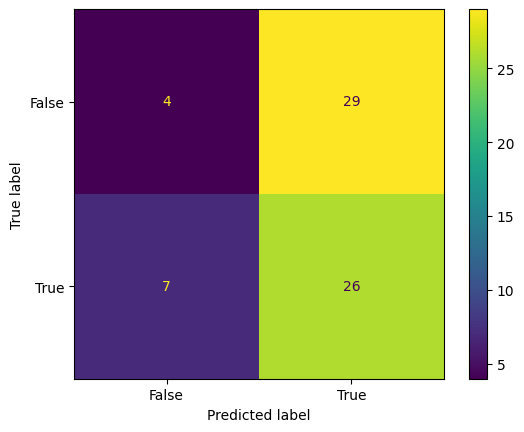

-------------------
SVC for  65  features encoding
--------------------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.1s
Utterance level accuracy:  0.5
0.6666666666666666
              precision    recall  f1-score   support

      class0       0.00      0.00      0.00        33
      class1       0.50      1.00      0.67        33

    accuracy                           0.50        66
   macro avg       0.25      0.50      0.33        66
weighted avg       0.25      0.50      0.33        66



C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


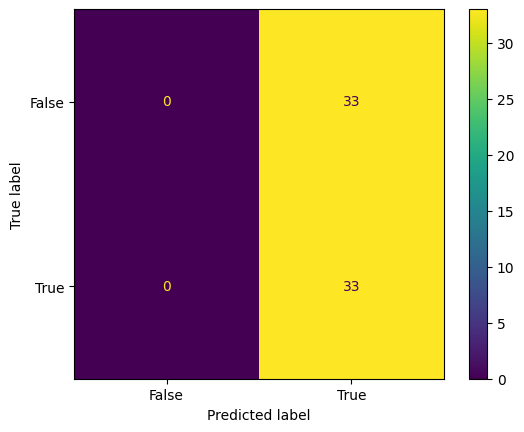

----------------------
Iteration over proceeding over to next
-----------------------
------------------
DT for  70  features encoding
------------------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
Utterance level accuracy:  0.5151515151515151
0.673469387755102
              precision    recall  f1-score   support

      class0       1.00      0.03      0.06        33
      class1       0.51      1.00      0.67        33

    accuracy                           0.52        66
   macro avg       0.75      0.52      0.37        66
weighted avg       0.75      0.52      0.37        66



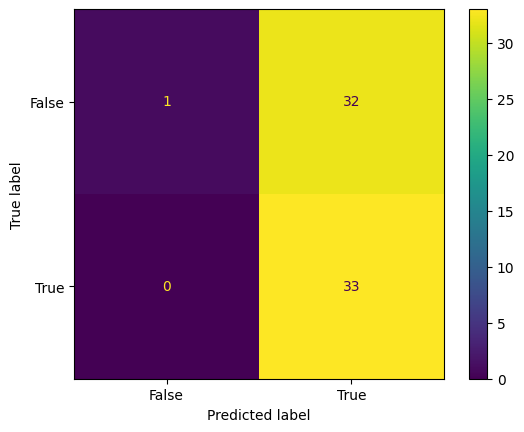

-------------------
SVC for  70  features encoding
--------------------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.1s
Utterance level accuracy:  0.5
0.6666666666666666
              precision    recall  f1-score   support

      class0       0.00      0.00      0.00        33
      class1       0.50      1.00      0.67        33

    accuracy                           0.50        66
   macro avg       0.25      0.50      0.33        66
weighted avg       0.25      0.50      0.33        66



C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


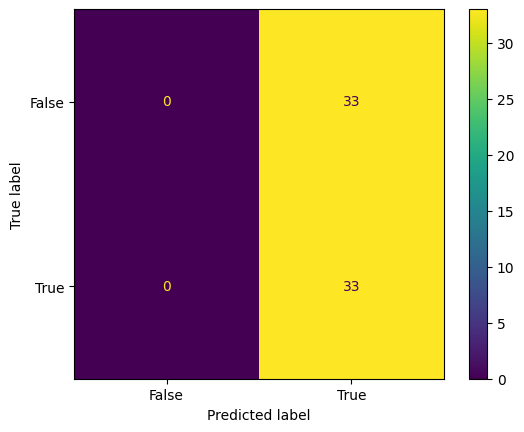

----------------------
Iteration over proceeding over to next
-----------------------
------------------
DT for  75  features encoding
------------------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
Utterance level accuracy:  0.4393939393939394
0.5194805194805195
              precision    recall  f1-score   support

      class0       0.41      0.27      0.33        33
      class1       0.45      0.61      0.52        33

    accuracy                           0.44        66
   macro avg       0.43      0.44      0.42        66
weighted avg       0.43      0.44      0.42        66



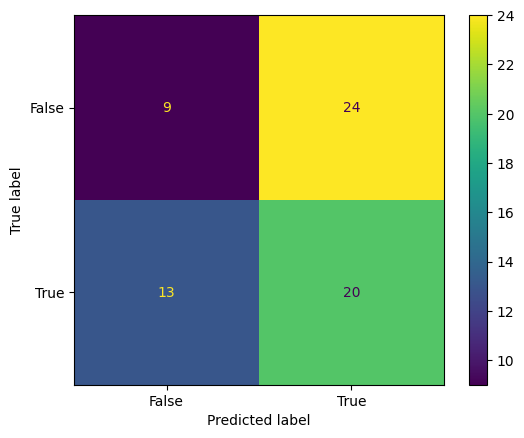

-------------------
SVC for  75  features encoding
--------------------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.1s
Utterance level accuracy:  0.5
0.6666666666666666
              precision    recall  f1-score   support

      class0       0.00      0.00      0.00        33
      class1       0.50      1.00      0.67        33

    accuracy                           0.50        66
   macro avg       0.25      0.50      0.33        66
weighted avg       0.25      0.50      0.33        66



C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


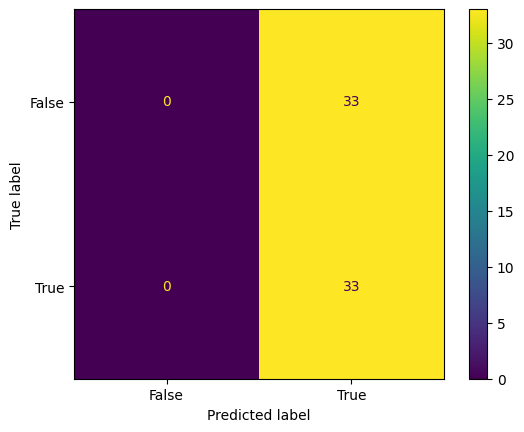

----------------------
Iteration over proceeding over to next
-----------------------
------------------
DT for  80  features encoding
------------------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
Utterance level accuracy:  0.5
0.6526315789473685
              precision    recall  f1-score   support

      class0       0.50      0.06      0.11        33
      class1       0.50      0.94      0.65        33

    accuracy                           0.50        66
   macro avg       0.50      0.50      0.38        66
weighted avg       0.50      0.50      0.38        66



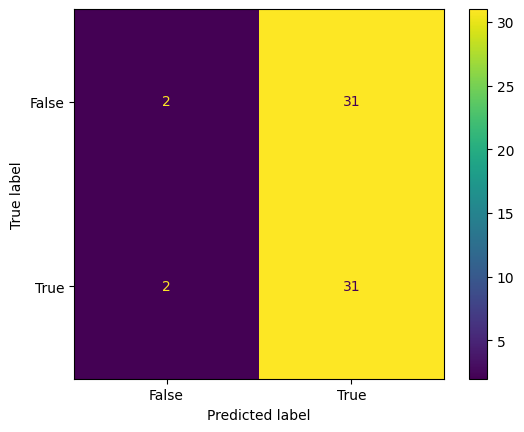

-------------------
SVC for  80  features encoding
--------------------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.1s
Utterance level accuracy:  0.5
0.6666666666666666
              precision    recall  f1-score   support

      class0       0.00      0.00      0.00        33
      class1       0.50      1.00      0.67        33

    accuracy                           0.50        66
   macro avg       0.25      0.50      0.33        66
weighted avg       0.25      0.50      0.33        66



C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


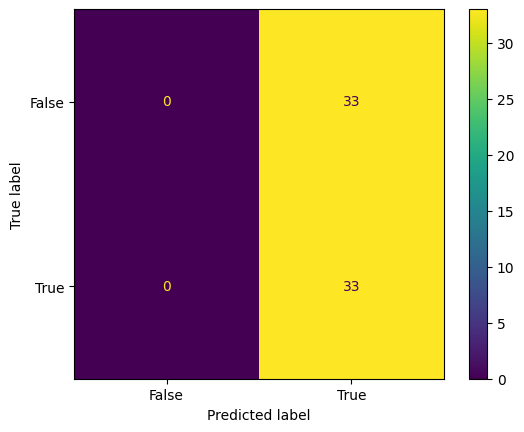

----------------------
Iteration over proceeding over to next
-----------------------
------------------
DT for  85  features encoding
------------------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
Utterance level accuracy:  0.5
0.6597938144329897
              precision    recall  f1-score   support

      class0       0.50      0.03      0.06        33
      class1       0.50      0.97      0.66        33

    accuracy                           0.50        66
   macro avg       0.50      0.50      0.36        66
weighted avg       0.50      0.50      0.36        66



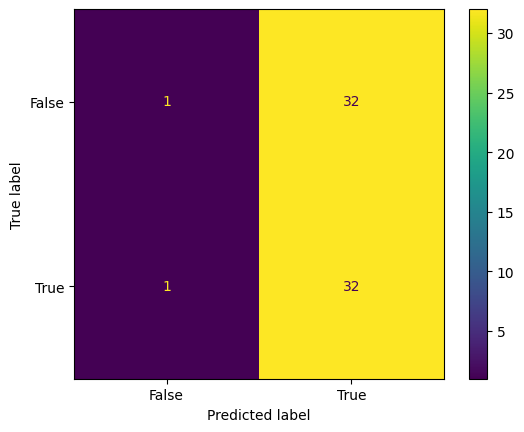

-------------------
SVC for  85  features encoding
--------------------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.1s
Utterance level accuracy:  0.5
0.6666666666666666
              precision    recall  f1-score   support

      class0       0.00      0.00      0.00        33
      class1       0.50      1.00      0.67        33

    accuracy                           0.50        66
   macro avg       0.25      0.50      0.33        66
weighted avg       0.25      0.50      0.33        66



C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\rishi\miniconda3\envs\tf\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


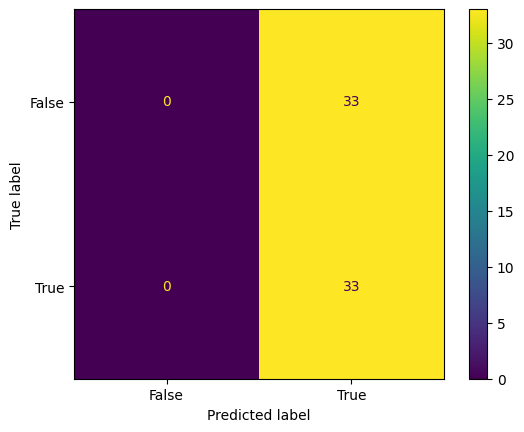

----------------------
Iteration over proceeding over to next
-----------------------


In [248]:
results_DT=[]
results_SVC=[]
for i in range(0,88,5):
    X_train_new=X_train_perm
    X_test_new=X_test_perm
    y_train=y_train_perm
    y_test=y_test_perm
    enc_dim=i
    import tensorflow as tf
    encoding_dim = 15
    ncol=88
    input_dim = Input(shape = (ncol, ))

    # Encoder Layers
    encoded1 = Dense(3000, activation = tf.keras.layers.LeakyReLU(alpha=0.3))(input_dim)
    encoded2 = Dense(2750, activation = tf.keras.layers.LeakyReLU(alpha=0.3))(encoded1)
    encoded3 = Dense(2500, activation = tf.keras.layers.LeakyReLU(alpha=0.3))(encoded2)
    encoded4 = Dense(2250, activation = tf.keras.layers.LeakyReLU(alpha=0.3))(encoded3)
    encoded5 = Dense(2000, activation = tf.keras.layers.LeakyReLU(alpha=0.3))(encoded4)
    encoded6 = Dense(1750, activation = tf.keras.layers.LeakyReLU(alpha=0.3))(encoded5)
    encoded7 = Dense(1500, activation = tf.keras.layers.LeakyReLU(alpha=0.3))(encoded6)
    encoded8 = Dense(1250, activation = tf.keras.layers.LeakyReLU(alpha=0.3))(encoded7)
    encoded9 = Dense(1000, activation = tf.keras.layers.LeakyReLU(alpha=0.3))(encoded8)
    encoded10 = Dense(750, activation = tf.keras.layers.LeakyReLU(alpha=0.3))(encoded9)
    encoded11 = Dense(500, activation = tf.keras.layers.LeakyReLU(alpha=0.3))(encoded10)
    encoded12 = Dense(250, activation = tf.keras.layers.LeakyReLU(alpha=0.3))(encoded11)
    encoded13 = Dense(encoding_dim, activation = 'sigmoid')(encoded12)

    # Decoder Layers
    decoded1 = Dense(250, activation = tf.keras.layers.LeakyReLU(alpha=0.3))(encoded13)
    decoded2 = Dense(500, activation = tf.keras.layers.LeakyReLU(alpha=0.3))(decoded1)
    decoded3 = Dense(750, activation = tf.keras.layers.LeakyReLU(alpha=0.3))(decoded2)
    decoded4 = Dense(1000, activation = tf.keras.layers.LeakyReLU(alpha=0.3))(decoded3)
    decoded5 = Dense(1250, activation = tf.keras.layers.LeakyReLU(alpha=0.3))(decoded4)
    decoded6 = Dense(1500, activation = tf.keras.layers.LeakyReLU(alpha=0.3))(decoded5)
    decoded7 = Dense(1750, activation = tf.keras.layers.LeakyReLU(alpha=0.3))(decoded6)
    decoded8 = Dense(2000, activation = tf.keras.layers.LeakyReLU(alpha=0.3))(decoded7)
    decoded9 = Dense(2250, activation = tf.keras.layers.LeakyReLU(alpha=0.3))(decoded8)
    decoded10 = Dense(2500, activation = tf.keras.layers.LeakyReLU(alpha=0.3))(decoded9)
    decoded11 = Dense(2750, activation = tf.keras.layers.LeakyReLU(alpha=0.3))(decoded10)
    decoded12 = Dense(3000, activation = tf.keras.layers.LeakyReLU(alpha=0.3))(decoded11)
    decoded13 = Dense(ncol, activation = 'sigmoid')(decoded12)

    # Combine Encoder and Deocder layers
    autoencoder = Model(inputs = input_dim, outputs = decoded13)

    # Compile the Model
    autoencoder.compile(optimizer = 'adadelta', loss = 'binary_crossentropy')
    
    from sklearn.preprocessing import minmax_scale
    train_scaled = minmax_scale(X_train_new, axis = 0)
    test_scaled = minmax_scale(X_test_new, axis = 0)
    X_train_new=train_scaled
    X_test_new=test_scaled
    X_train_new, y_train = oversample.fit_resample(X_train_new, y_train)
    X_test_new, y_test =undersample.fit_resample(X_test_new, y_test)
    train_scaled=X_train_new
    test_scaled=X_test_new
    autoencoder.fit(train_scaled, train_scaled, epochs = 15, batch_size = 32, shuffle = False, validation_data = (test_scaled, test_scaled),verbose=False)
    # bottleneck feature encoding
    encoder = Model(inputs = input_dim, outputs = encoded13)
    encoded_input = Input(shape = (encoding_dim, ))
    print("------------------")
    print("DT for ",i," features encoding")
    print("------------------")
    pipe2 = Pipeline([ ('std', StandardScaler()), ('decision_tree', DecisionTreeClassifier())], verbose = True)

    # fitting the data in the pipe
    pipe2.fit(X_train_new, y_train)

    prob_score2=pipe2.predict_proba(X_test_new)

    print("Utterance level accuracy: ",accuracy_score(y_test, pipe2.predict(X_test_new)))
    # accuracy(y_test, prob_score2, s_test)
    results_DT.append([accuracy_score(y_test, pipe2.predict(X_test_new)),sklearn.metrics.f1_score(y_test, pipe2.predict(X_test_new))])
    print(sklearn.metrics.f1_score(y_test, pipe2.predict(X_test_new)))
    print(classification_report(y_test, pipe2.predict(X_test_new),target_names=["class0","class1"]))
    confusion_matrix = metrics.confusion_matrix(y_test, pipe2.predict(X_test_new))
    dt_score=pipe2.predict_proba(X_test_new)
    # print("dt_score is ",dt_score)
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    cm_display.plot()
    plt.show()
    
    print("-------------------")
    print("SVC for ",i," features encoding")
    print("--------------------")
    svc = SVC(C=1.0, random_state=1, kernel='linear',probability=True)

    # Fit the model
    svc.fit(X_train_new, y_train)
    pipe1 = Pipeline([ ('std', StandardScaler()), ('SVC', SVC(C=1.0, random_state=1, kernel='linear', probability=True))], verbose = True)

    # fitting the data in the pipe
    pipe1.fit(X_train_new, y_train)

    prob_score=pipe1.predict_proba(X_test_new)
    print("Utterance level accuracy: ", accuracy_score(y_test, pipe1.predict(X_test_new)))
    # accuracy(y_test, prob_score, s_test)
    results_SVC.append([accuracy_score(y_test, pipe1.predict(X_test_new)),sklearn.metrics.f1_score(y_test, pipe1.predict(X_test_new))])
    print(sklearn.metrics.f1_score(y_test, pipe1.predict(X_test_new)))
    print(classification_report(y_test, pipe1.predict(X_test_new),target_names=["class0","class1"]))
    svc_score=prob_score
    # print(svc_score)
    confusion_matrix = metrics.confusion_matrix(y_test, pipe1.predict(X_test_new))
    cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])
    cm_display.plot()
    plt.show()
    
    print("----------------------")
    print("Iteration over proceeding over to next")
    print("-----------------------")

In [259]:
[i[0] for i in results_DT]

[0.48484848484848486,
 0.5,
 0.4696969696969697,
 0.5303030303030303,
 0.45454545454545453,
 0.5151515151515151,
 0.4696969696969697,
 0.5,
 0.48484848484848486,
 0.5454545454545454,
 0.5,
 0.4696969696969697,
 0.5151515151515151,
 0.45454545454545453,
 0.5151515151515151,
 0.4393939393939394,
 0.5,
 0.5]

In [260]:
[i[0] for i in results_SVC]

[0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5,
 0.5]

# Iterating over number of features

In [19]:
acc_DT=[]
acc_RF=[]
acc_SVC=[]
acc_LR=[]

In [27]:
for i in range(0,88):
    etc=ExtraTreesClassifier(n_estimators=150,verbose=True)
    etc=etc.fit(X_train, y_train)
    th=-np.sort(-etc.feature_importances_)[i]
    res = [idx for idx, val in enumerate(etc.feature_importances_) if val >= th]
    res=np.asarray(res)
    X_train_new=(X_train[:,res])
    X_test_new=X_test[:,res]
    print(np.shape(X_test_new))
    print(np.shape(X_train_new))
    print("---------")
    print("Decsion Tree")
    print("----------")
    pipe2 = Pipeline([ ('std', StandardScaler()), ('decision_tree', DecisionTreeClassifier())], verbose = True)
    # fitting the data in the pipe
    pipe2.fit(X_train_new, y_train)
    acc_DT.append(accuracy_score(y_test, pipe2.predict(X_test_new)))
    print("---------")
    print("Random Forest")
    print("----------")
    pipe1 = Pipeline([ ('std', StandardScaler()), ('Random_forest', RandomForestClassifier(n_estimators = 150))], verbose = True)
    # fitting the data in the pipe
    pipe1.fit(X_train_new, y_train)
    acc_RF.append(accuracy_score(y_test, pipe1.predict(X_test_new)))
    print("---------")
    print("SVC")
    print("----------")
    pipe1 = Pipeline([ ('std', StandardScaler()), ('SVC', SVC(C=1.0, random_state=1, kernel='linear', probability=True))], verbose = True)
    # fitting the data in the pipe
    pipe1.fit(X_train_new, y_train)
    acc_SVC.append(accuracy_score(y_test, pipe1.predict(X_test_new)))
    print("-----------")
    print("LR")
    print("-----------")
    pipe1 = Pipeline([ ('std', StandardScaler()), ('LR', linear_model.LogisticRegression())], verbose = True)
    # fitting the data in the pipe
    pipe1.fit(X_train_new, y_train)
    acc_LR.append(accuracy_score(y_test, pipe1.predict(X_test_new)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


(233, 1)
(248, 1)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.1s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


(233, 2)
(248, 2)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.1s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


(233, 3)
(248, 3)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.1s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


(233, 4)
(248, 4)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


(233, 5)
(248, 5)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


(233, 6)
(248, 6)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


(233, 7)
(248, 7)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


(233, 8)
(248, 8)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


(233, 9)
(248, 9)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


(233, 10)
(248, 10)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


(233, 11)
(248, 11)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s
(233, 12)
(248, 12)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, tot

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s
(233, 13)
(248, 13)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s
(233, 14)
(248, 14)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s
(233, 15)
(248, 15)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s
(233, 16)
(248, 16)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s
(233, 17)
(248, 17)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s
(233, 18)
(248, 18)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s
(233, 19)
(248, 19)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s
(233, 20)
(248, 20)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s
(233, 21)
(248, 21)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s
(233, 22)
(248, 22)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s
(233, 23)
(248, 23)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s
(233, 24)
(248, 24)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s
(233, 25)
(248, 25)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s
(233, 26)
(248, 26)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s
(233, 27)
(248, 27)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s
(233, 28)
(248, 28)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s
(233, 29)
(248, 29)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s
(233, 30)
(248, 30)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s
(233, 31)
(248, 31)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s
(233, 32)
(248, 32)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s
(233, 33)
(248, 33)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s
(233, 34)
(248, 34)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s
(233, 35)
(248, 35)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s
(233, 36)
(248, 36)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s
(233, 37)
(248, 37)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s
(233, 38)
(248, 38)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s
(233, 39)
(248, 39)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s
(233, 40)
(248, 40)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s
(233, 41)
(248, 41)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s
(233, 42)
(248, 42)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s
(233, 43)
(248, 43)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s
(233, 44)
(248, 44)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


(233, 45)
(248, 45)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s
(233, 46)
(248, 46)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s
(233, 47)
(248, 47)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s
(233, 48)
(248, 48)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


(233, 49)
(248, 49)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s
(233, 50)
(248, 50)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s
(233, 51)
(248, 51)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s
(233, 52)
(248, 52)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s
(233, 53)
(248, 53)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s
(233, 54)
(248, 54)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s
(233, 55)
(248, 55)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


(233, 56)
(248, 56)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


(233, 57)
(248, 57)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


(233, 58)
(248, 58)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


(233, 59)
(248, 59)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s
(233, 60)
(248, 60)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.3s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


(233, 61)
(248, 61)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


(233, 62)
(248, 62)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


(233, 63)
(248, 63)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s
(233, 64)
(248, 64)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s
(233, 65)
(248, 65)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s
(233, 66)
(248, 66)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s
(233, 67)
(248, 67)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s
(233, 68)
(248, 68)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s
(233, 69)
(248, 69)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s
(233, 70)
(248, 70)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s
(233, 71)
(248, 71)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s
(233, 72)
(248, 72)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.3s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


(233, 73)
(248, 73)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


(233, 74)
(248, 74)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.3s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


(233, 75)
(248, 75)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


(233, 76)
(248, 76)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.3s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


(233, 77)
(248, 77)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s
(233, 78)
(248, 78)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.3s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


(233, 79)
(248, 79)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


(233, 80)
(248, 80)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.2s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s
(233, 81)
(248, 81)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.3s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s
(233, 82)
(248, 82)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.3s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


(233, 83)
(248, 83)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.3s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


(233, 84)
(248, 84)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.3s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


(233, 85)
(248, 85)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.3s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


(233, 86)
(248, 86)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.3s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


(233, 87)
(248, 87)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.3s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    0.0s finished


(233, 88)
(248, 88)
---------
Decsion Tree
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing decision_tree, total=   0.0s
---------
Random Forest
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ..... (step 2 of 2) Processing Random_forest, total=   0.4s
---------
SVC
----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing SVC, total=   0.0s
-----------
LR
-----------
[Pipeline] ............... (step 1 of 2) Processing std, total=   0.0s
[Pipeline] ................ (step 2 of 2) Processing LR, total=   0.0s


In [28]:
x=np.arange(1,88)
x

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87])

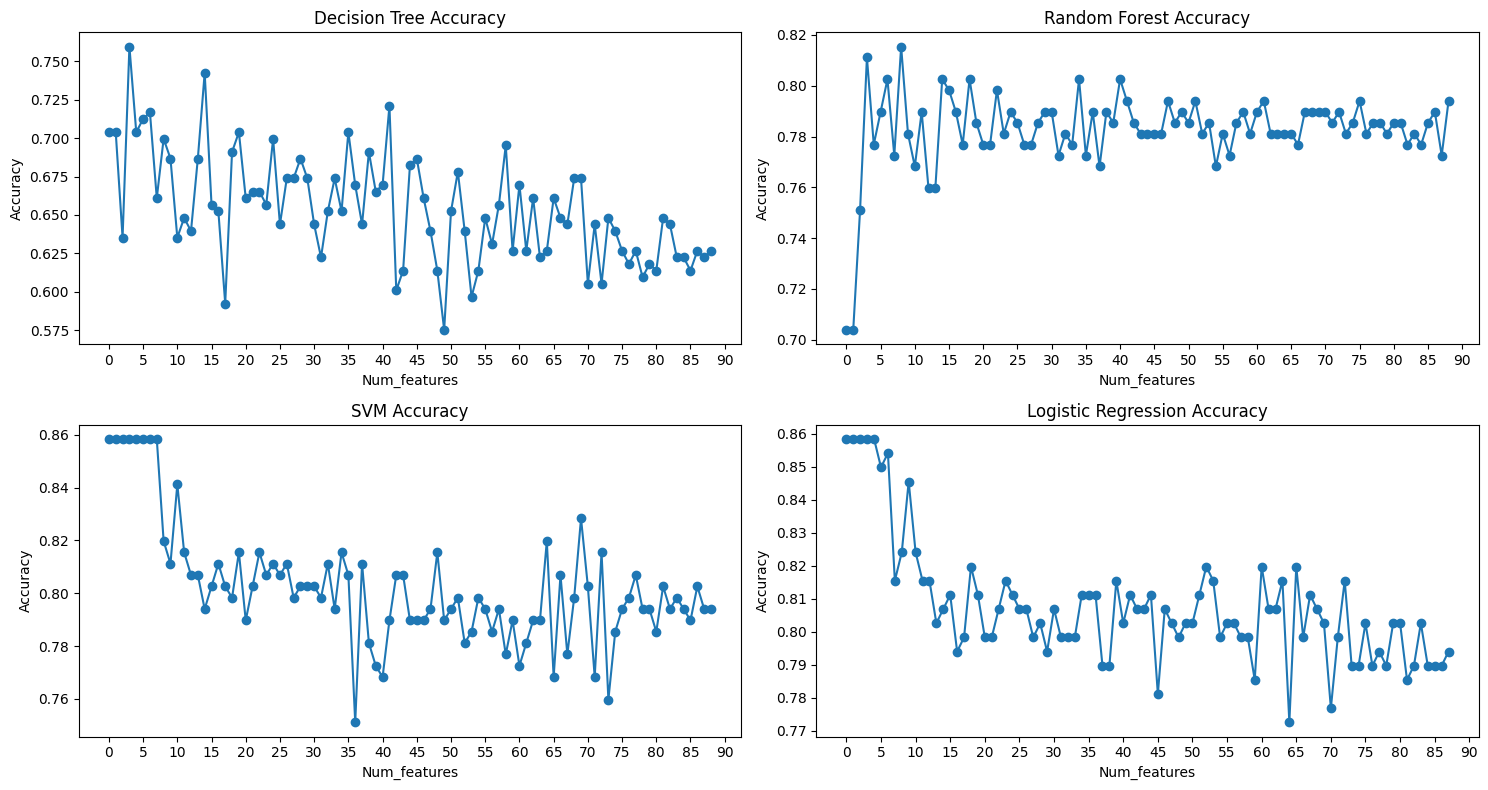

In [29]:
fig, axes = plt.subplots(2, 2, figsize=(15, 8))

# Plot the data in each subplot
axes[0, 0].plot(acc_DT, marker='o')
axes[0, 0].set_title('Decision Tree Accuracy')

axes[0, 1].plot(acc_RF, marker='o')
axes[0, 1].set_title('Random Forest Accuracy')

axes[1, 0].plot(acc_SVC, marker='o')
axes[1, 0].set_title('SVM Accuracy')

axes[1, 1].plot(acc_LR, marker='o')
axes[1, 1].set_title('Logistic Regression Accuracy')

# Add labels and titles
for ax in axes.flat:
    ax.set(xlabel='Num_features', ylabel='Accuracy')
for ax in axes.flat:
    ax.locator_params(axis='x', nbins=20)  # Increase the number of x-axis ticks
    ax.locator_params(axis='y', nbins=10) 
# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [34]:
max_dt=max(acc_DT)
max_dt_ind=acc_DT.index(max(acc_DT))
max_rf=max(acc_RF)
max_rf_ind=acc_RF.index(max(acc_RF))
max_svc=max(acc_SVC)
max_svc_ind=acc_SVC.index(max(acc_SVC))
max_lr=max(acc_LR)
max_lr_ind=acc_LR.index(max(acc_LR))
print("DT: ",max_dt," numfeat: ",max_dt_ind)
print("RF: ",max_rf," numfeat: ",max_rf_ind)
print("SVC: ",max_svc," numfeat: ",max_svc_ind)
print("LR: ",max_lr," numfeat: ",max_lr_ind)

DT:  0.759656652360515  numfeat:  3
RF:  0.8154506437768241  numfeat:  8
SVC:  0.8583690987124464  numfeat:  0
LR:  0.8583690987124464  numfeat:  0


In [37]:
acc_RF[3]

0.8111587982832618

# Final Conclusion:


1. The five models used in classification of Depressed and Non-Depressed speech provide the following Accuracy:

## Utterance Level Accuracy

a. Decision Tree : 0.5949214026602176,
b. Decision Tree (CV) : 0.626118500604595,
c. Random Forest : 0.6740024183796857,
d. SVM           : 0.7180169286577993,
e. Logistic Regg : 0.7139056831922612

Hence, We can say that SVM is giving the best result.

## Speaker Level Accuracy

a. Decision Tree : 0.7021276595744681, b. Decision Tree (CV) : 0.7659574468085106, c. Random Forest : 0.7021276595744681, d. SVM : 0.7021276595744681, e. Logistic Regg : 0.7446808510638298

Hence , Decision Tree(CV) is performing best at speaker level.

## F1 Score

a. Decision Tree : 0.7943240768996034, b. Decision Tree (CV) : 0.793355684242609, c. Random Forest: 0.7921820125209956, d. SVM : 0.8358671171171171, e. Logistic Regg : 0.8282270945259185

Hence, SVM is  giving the best F1 score.